## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

### Objective

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st    quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [94]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics

# To impute missing values
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To build ensemble classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

# To suppress the warning
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [95]:
data_raw = pd.read_csv('BankChurners.csv')

In [3]:
print(f'There are {data_raw.shape[0]} rows and {data_raw.shape[1]} columns in the dataset')

There are 10127 rows and 21 columns in the dataset


In [4]:
data_raw.sample(random_state=12, n=10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2469,721475133,Existing Customer,54,F,1,Doctorate,Single,Unknown,Blue,36,6,3,4,26053.0,829,25224.0,0.669,2768,70,0.628,0.032
6994,780897858,Existing Customer,38,F,2,High School,Single,Less than $40K,Blue,20,4,3,3,2420.0,676,1744.0,0.782,3770,76,0.810,0.279
9520,772640808,Existing Customer,38,F,1,College,Single,Less than $40K,Blue,28,2,2,2,4623.0,1366,3257.0,0.776,14730,118,0.735,0.295
7171,803339583,Existing Customer,49,F,2,Post-Graduate,Married,Less than $40K,Blue,44,4,4,2,1644.0,0,1644.0,1.033,4898,82,0.783,0.000
517,793473033,Existing Customer,51,M,1,Graduate,Single,$60K - $80K,Blue,45,3,2,3,3228.0,2517,711.0,0.949,1349,33,1.357,0.780
7553,709965858,Existing Customer,46,M,1,High School,Married,$120K +,Blue,28,4,3,3,9880.0,1792,8088.0,0.804,4609,80,0.951,0.181
9009,770705208,Existing Customer,44,F,2,Unknown,Single,Less than $40K,Gold,30,1,3,3,15365.0,630,14735.0,0.807,7890,91,0.685,0.041
6381,716733933,Existing Customer,42,F,2,High School,Married,Unknown,Blue,30,5,3,2,1898.0,725,1173.0,0.664,5051,64,1.065,0.382
8564,778860783,Attrited Customer,57,M,2,Unknown,Divorced,$120K +,Blue,38,1,2,4,24379.0,1116,23263.0,0.620,2836,41,0.281,0.046
8305,710832108,Existing Customer,52,F,2,Unknown,Single,$40K - $60K,Blue,44,2,3,3,9017.0,2359,6658.0,0.895,4552,81,0.800,0.262


### Observations
* CLIENTNUM column doesn't provide any value and can be removed for the model building purposes.
* Income_Category column might need feature engineering. Let's explore this column more

In [5]:
data_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127,NaN,NaN,NaN,7.39178e+08,3.69038e+07,7.08082e+08,7.13037e+08,7.17926e+08,7.73144e+08,8.28343e+08
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127,NaN,NaN,NaN,46.326,8.01681,26,41,46,52,73
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127,NaN,NaN,NaN,2.3462,1.29891,0,1,2,3,5
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127,NaN,NaN,NaN,35.9284,7.98642,13,31,36,40,56


### Observations

* Credit_Limit, Avg_Open_to_Buy, Avg_Utilization_Ratio columns have outliers
* There are 8500 columns with Attrition_Flag as Exisiting Customer. This means the dataset is highly imbalanced w.r.t target variable
* Most of the users Card_category is Blue

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations
* It looks like the dataset is free from missing values

In [7]:
data = data_raw.copy()

In [8]:
# Remove CLIENTNUM  from the dataset
data.drop('CLIENTNUM', inplace=True, axis=1)

#### Convert some columns to category

In [9]:
cat_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in cat_col:
    data[col] = data[col].astype('category')

In [10]:
for col in cat_col:
    print(data[col].value_counts())
    print('\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


F    5358
M    4769
Name: Gender, dtype: int64


Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64




### Observations
* There are 8500 columns with Attrition_Flag as Exisiting Customer. This means the dataset is highly imbalanced w.r.t target variable
* The dataset has nearly comparable nuber of male and female customers
* Most of the customers are graduates, followed by HighSchool 
* Majority of the customers are married
* Majority of the customers have salary less than 40K
* Majority of the customer has the Blue category card

### EDA

### Univariate analysis

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

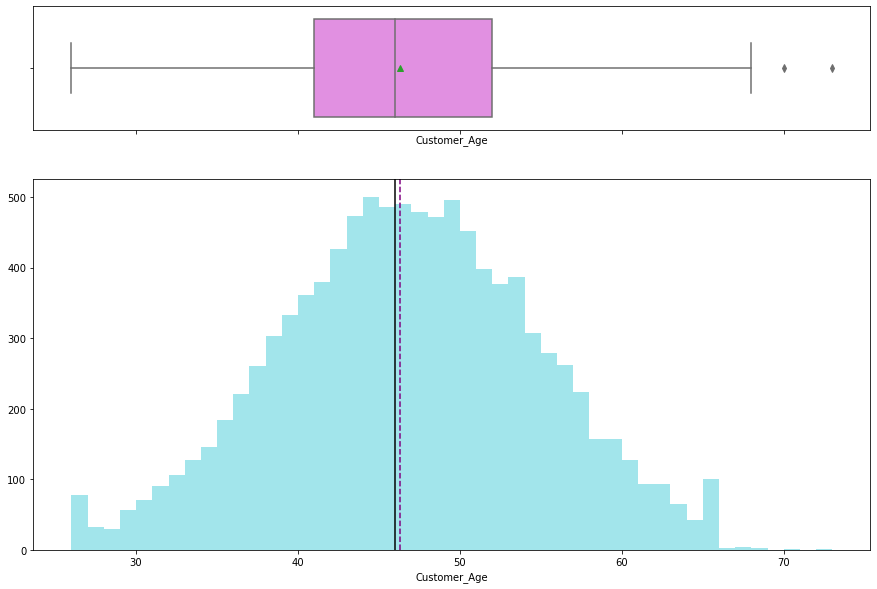

In [12]:
histogram_boxplot(data['Customer_Age'])

* Customer_Age is normally distributed with mean and median around 46.

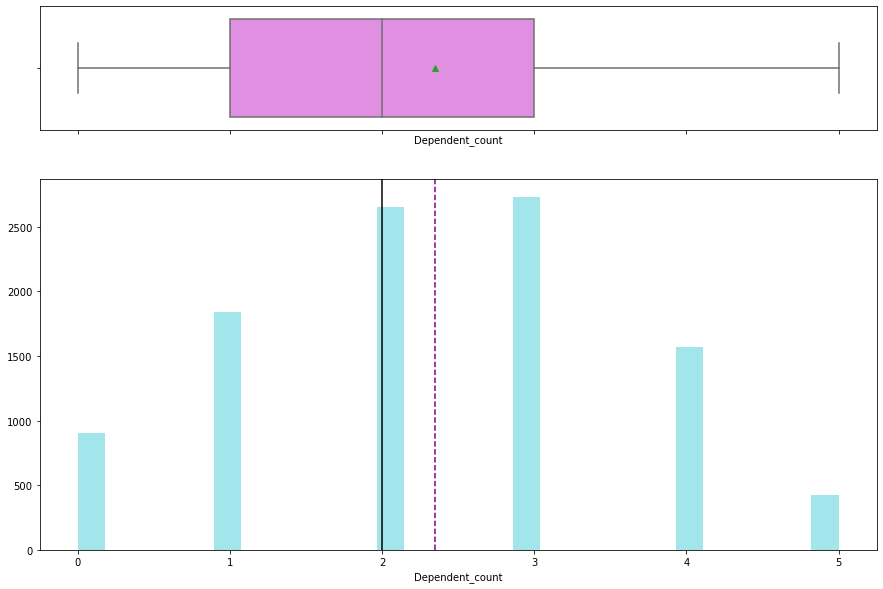

In [13]:
histogram_boxplot(data['Dependent_count'])

* Most of the customers have 2 or 3 dependents 

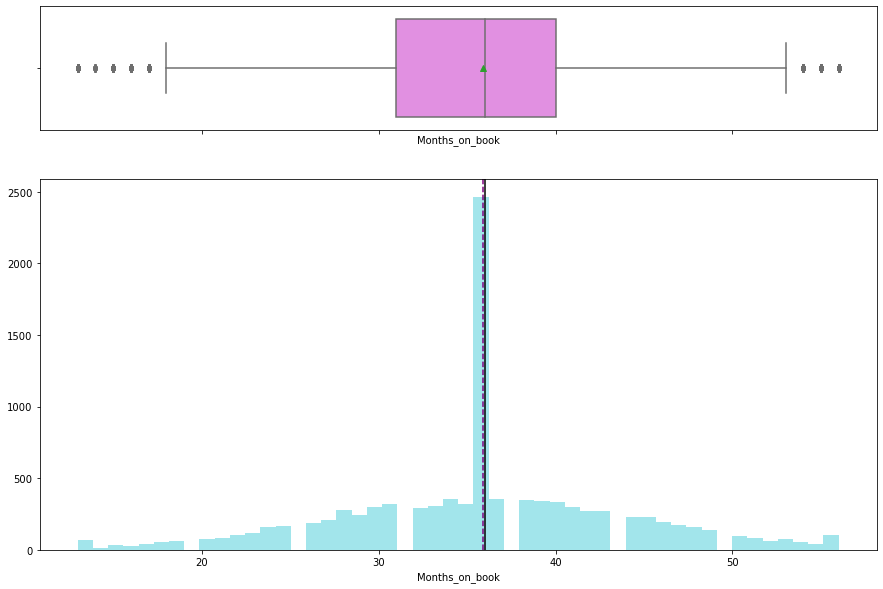

In [14]:
histogram_boxplot(data['Months_on_book'])

* Around 2500 customers out of 10000 customers have Months_on_book around 36 months. 
* There are a few lower and upper outliers

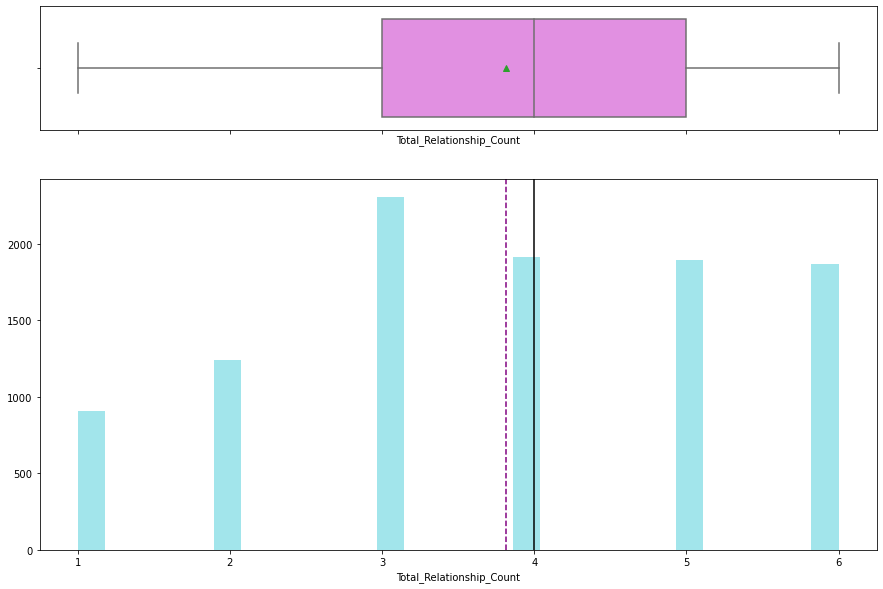

In [15]:
histogram_boxplot(data['Total_Relationship_Count'])

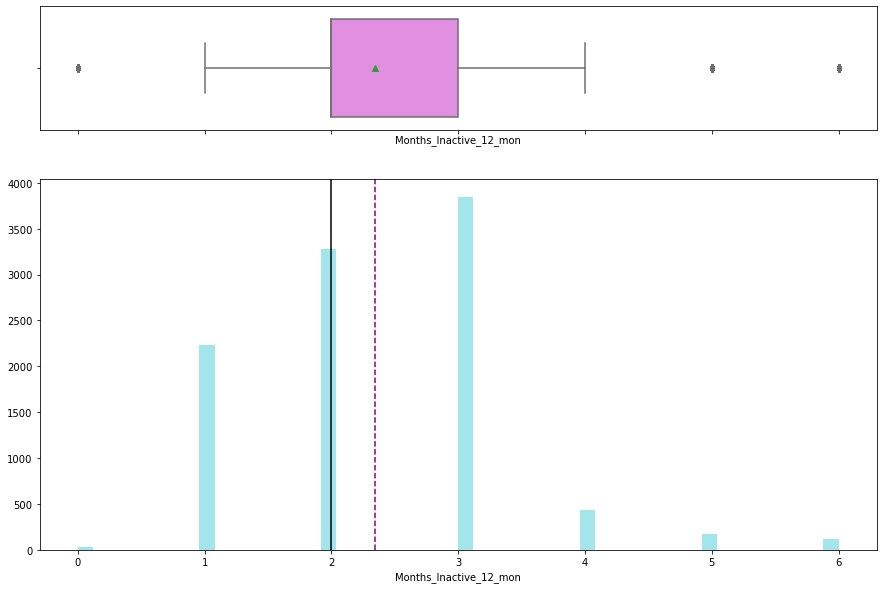

In [16]:
histogram_boxplot(data['Months_Inactive_12_mon'])

* Majority of the customers are inactive for 2 to 3 months. There are a few outliers with 5 and 6 months

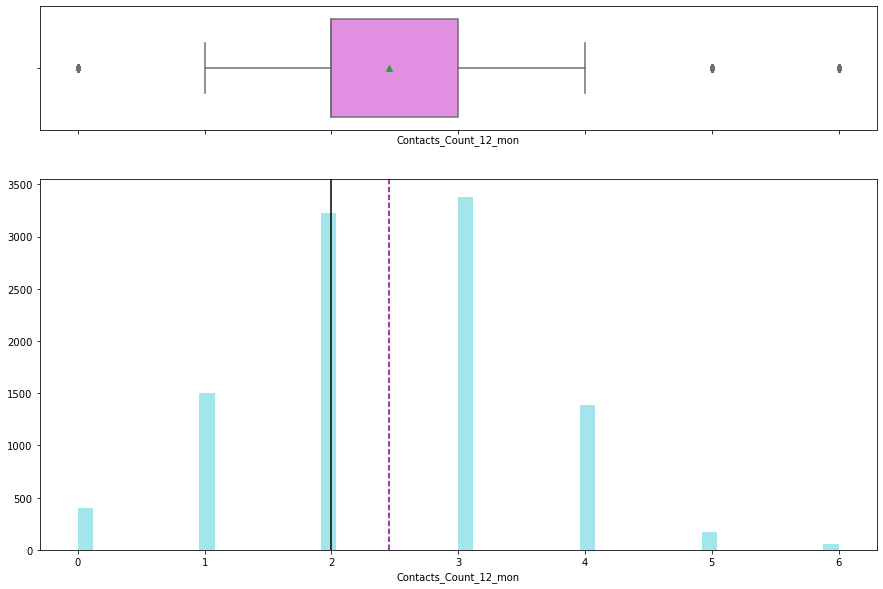

In [17]:
histogram_boxplot(data['Contacts_Count_12_mon'])

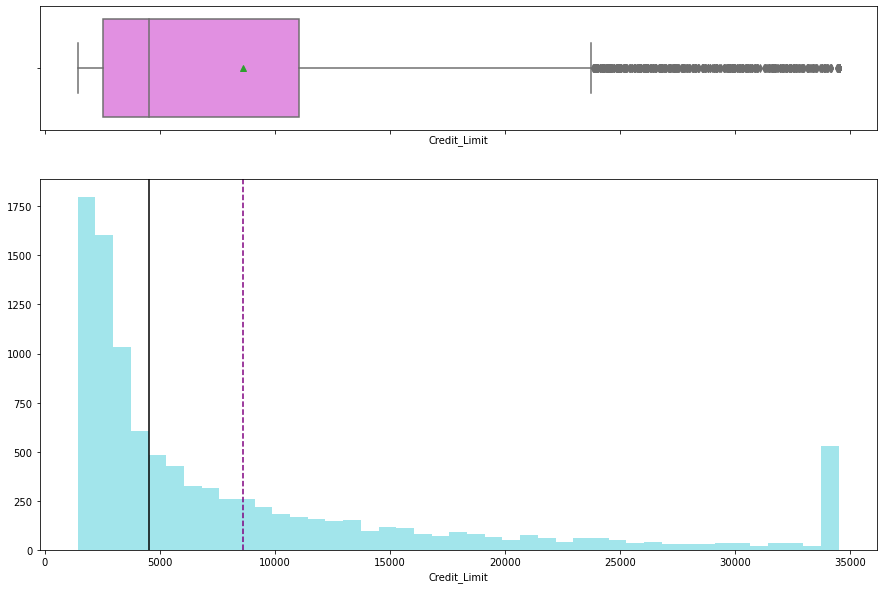

In [18]:
histogram_boxplot(data['Credit_Limit'])

* Credit limit is right skewed. 
* Median is around 5000 and there are many upper outliers

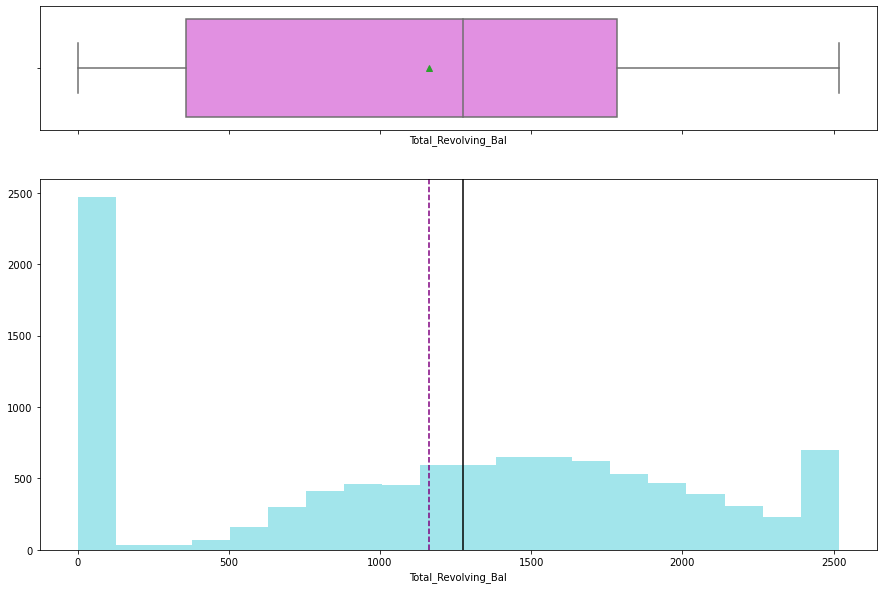

In [19]:
histogram_boxplot(data['Total_Revolving_Bal'])

* Around 2500 people have nearly 0 total revolving balance

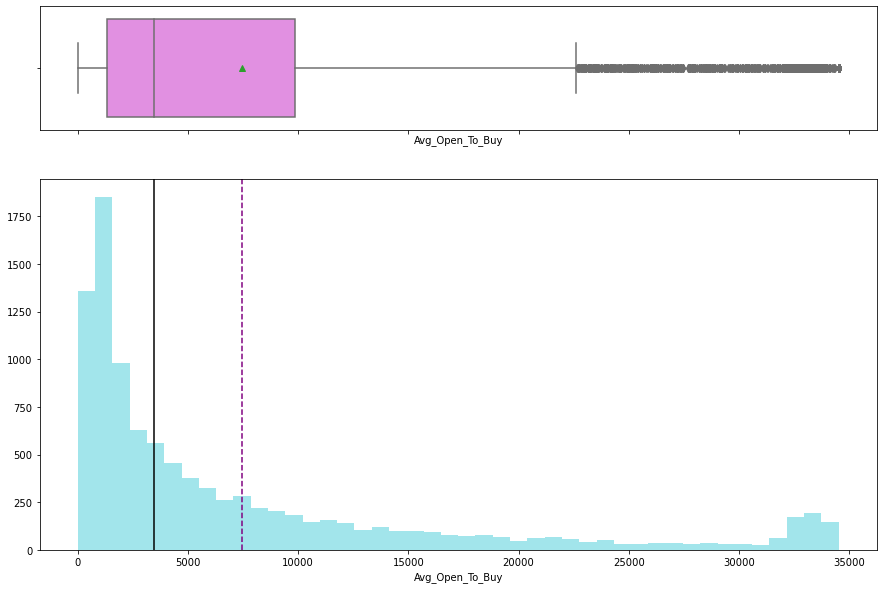

In [20]:
histogram_boxplot(data['Avg_Open_To_Buy'])

* The graph is right skewed.
* There are many upper outliers

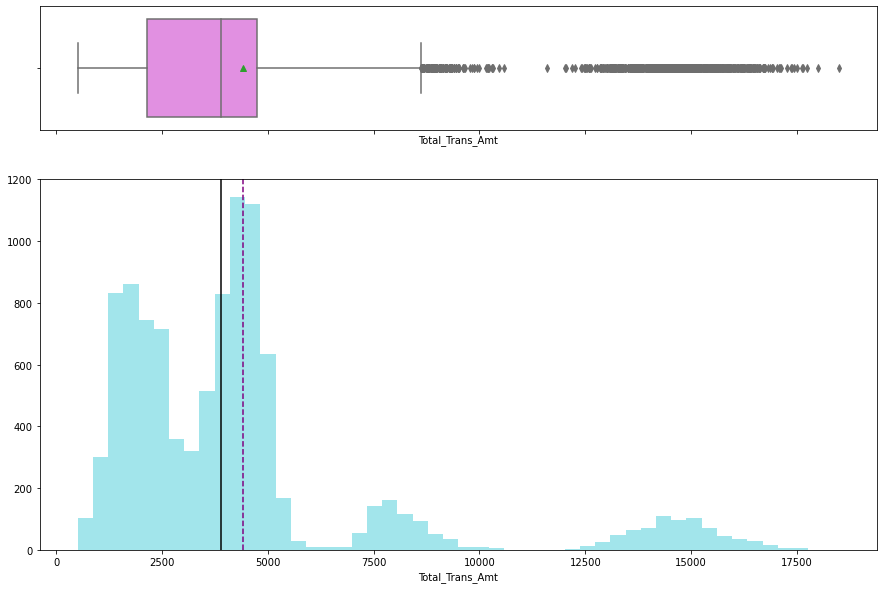

In [21]:
histogram_boxplot(data['Total_Trans_Amt'])

* Graph shows upper outliers
* Majority of the people have transaction amout below 5000

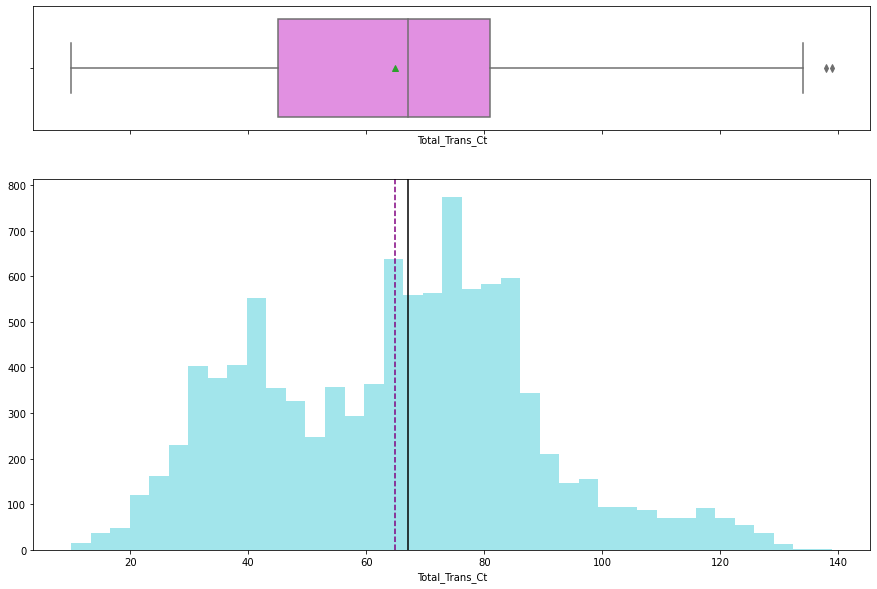

In [22]:
histogram_boxplot(data['Total_Trans_Ct'])

* The graph looks somewhat normally distributed though it's not perfect

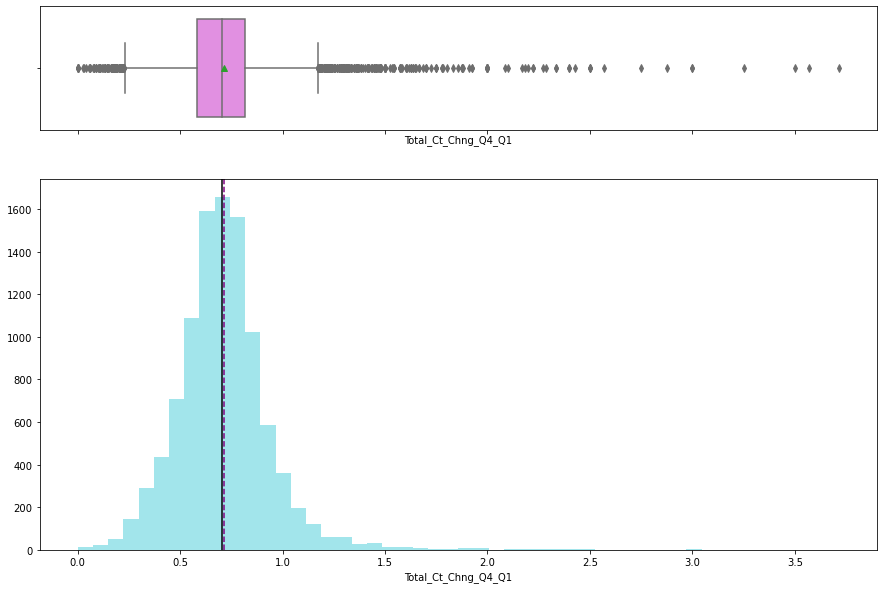

In [23]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

* Majority of the values are below 1.5. There are many upper outliers though
* The graph looks normally distributed excluding the outliers

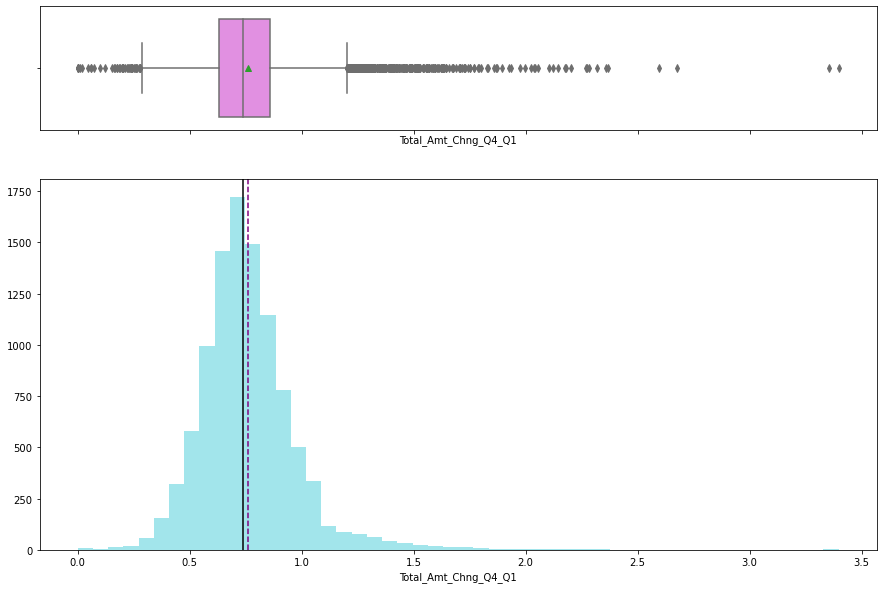

In [24]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

* Same characteristics as the graph above

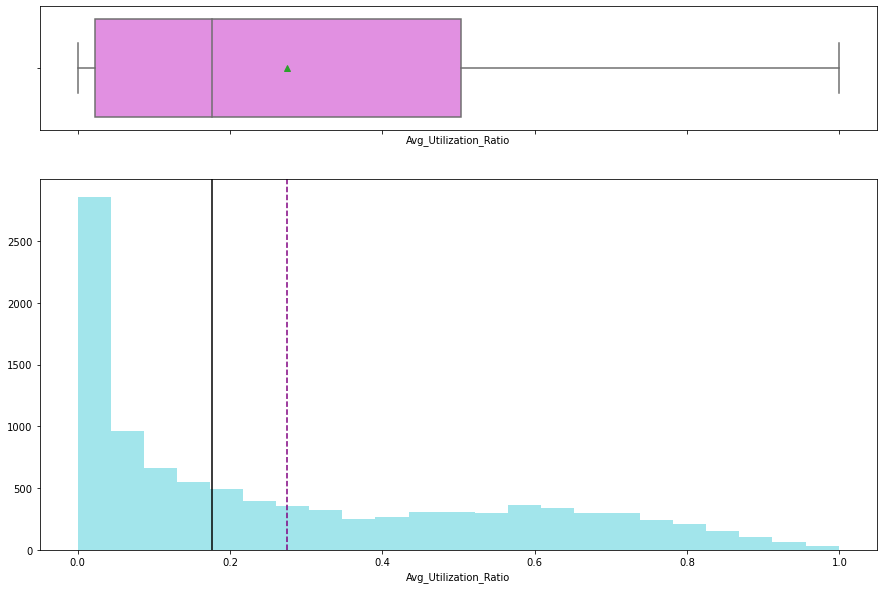

In [25]:
histogram_boxplot(data['Avg_Utilization_Ratio'])

* Graph is right skewed
* Around 2500 customers have zero Avg_Utilization_Ratio

In [26]:
# Function to create bar plots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

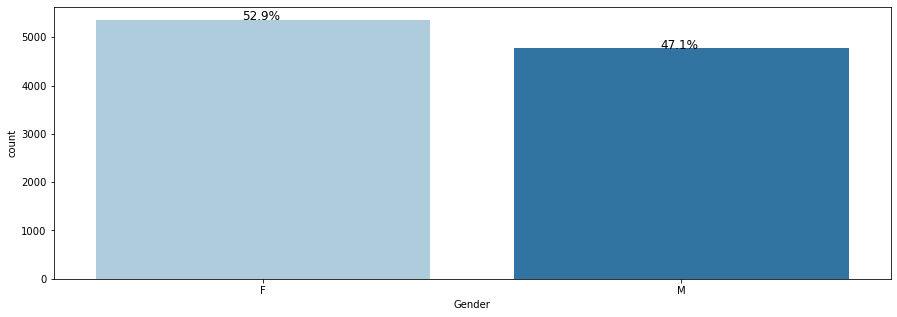

In [27]:
perc_on_bar('Gender')

* There are almost similar number of Male and Female in the customer base

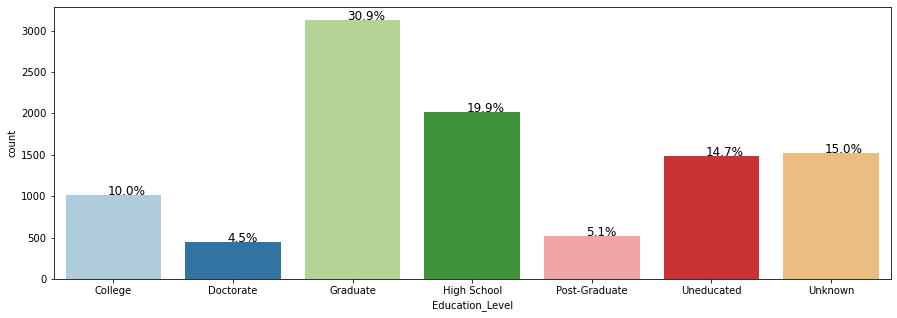

In [28]:
perc_on_bar('Education_Level')

* 30.9% of the customers are graduates. Nearly 1/3 of the customers are graduates

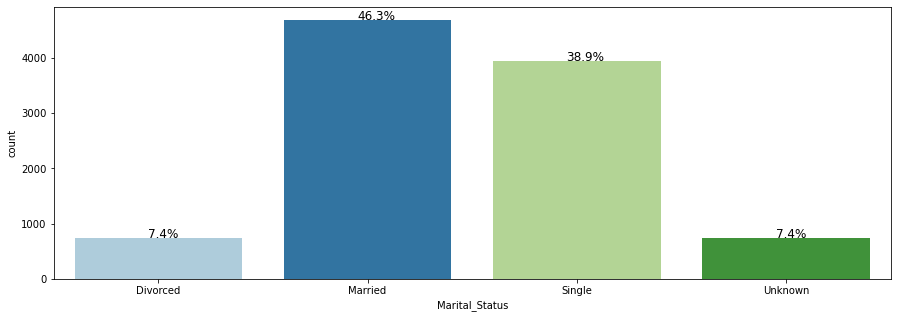

In [29]:
perc_on_bar('Marital_Status')

* 46.3% of the customers are married

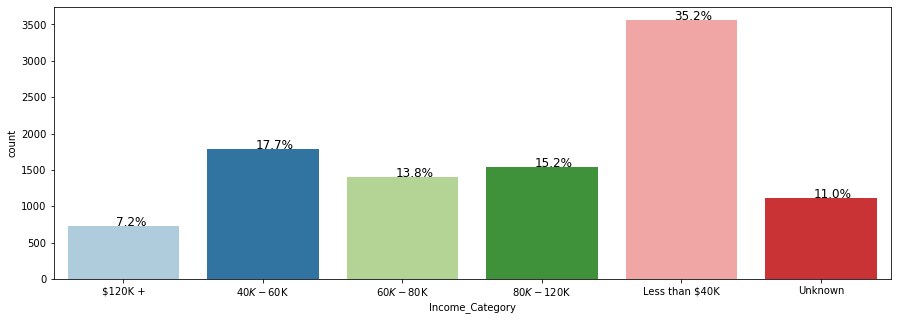

In [30]:
perc_on_bar('Income_Category')

* 35.2% of the customers earn less than 40K. 

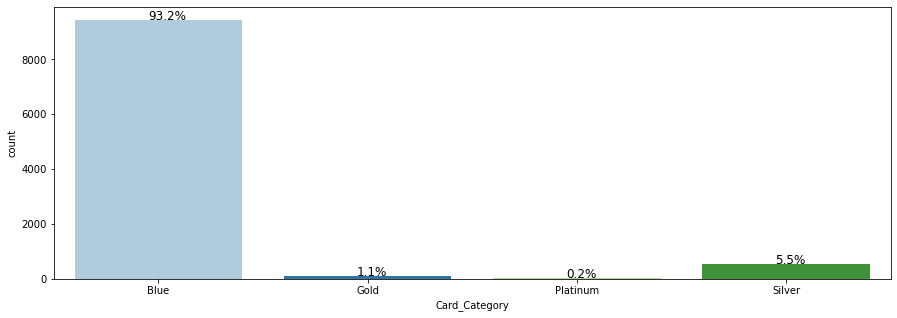

In [31]:
perc_on_bar('Card_Category')

* 93.2% of the customer cards are Blue category. This is highly imbalanced category

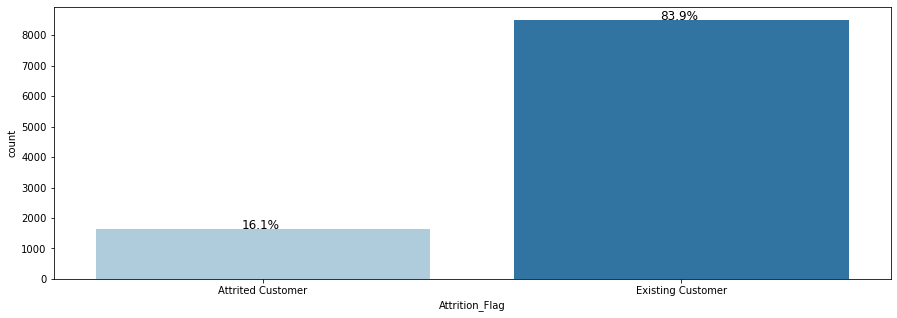

In [32]:
perc_on_bar('Attrition_Flag')

* Only 16.1% of the customers are attrited customers.
* Dataset is highly imbalanced w.r.t the target variable

### Bivariate analysis

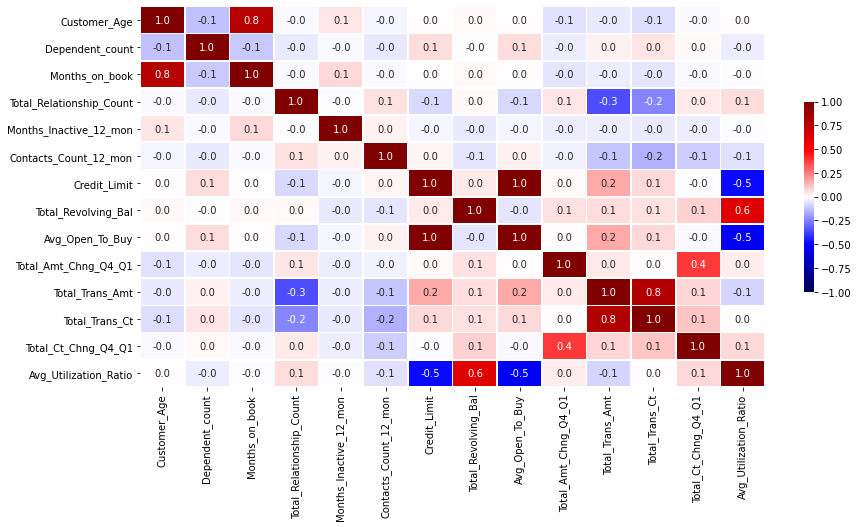

In [33]:
# Correlation
corr = data.corr()
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

#### Observations

1. Customer's age is highly positively correlated with period of relationship with the bank
2. Credit limit is fully correleated with the amount left on the credit card to use (correlations is 1.0)
3. Credit limit is somewhat negatively correlated with Avg_Utilization_Ratio
4. Total_Revolving_Bal is negatively correlated with Avg_Utilization_Ratio
5. Total Transaction Count is highly positively correlated with Total Transaction Amount

In [34]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


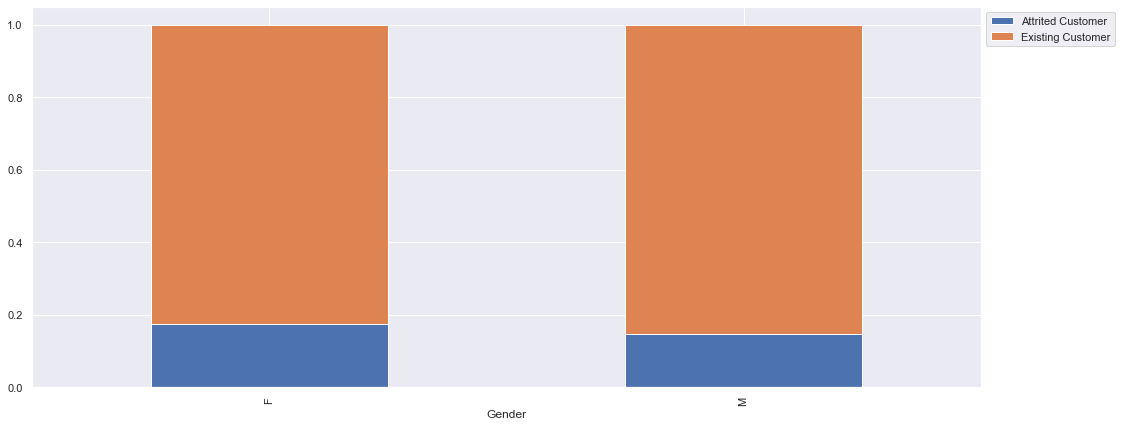

In [35]:
stacked_plot(data['Gender'])

* Percentage of attrited customers who are Female is slightly higher than that of Male. It is not significant enough to make any conclusions

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


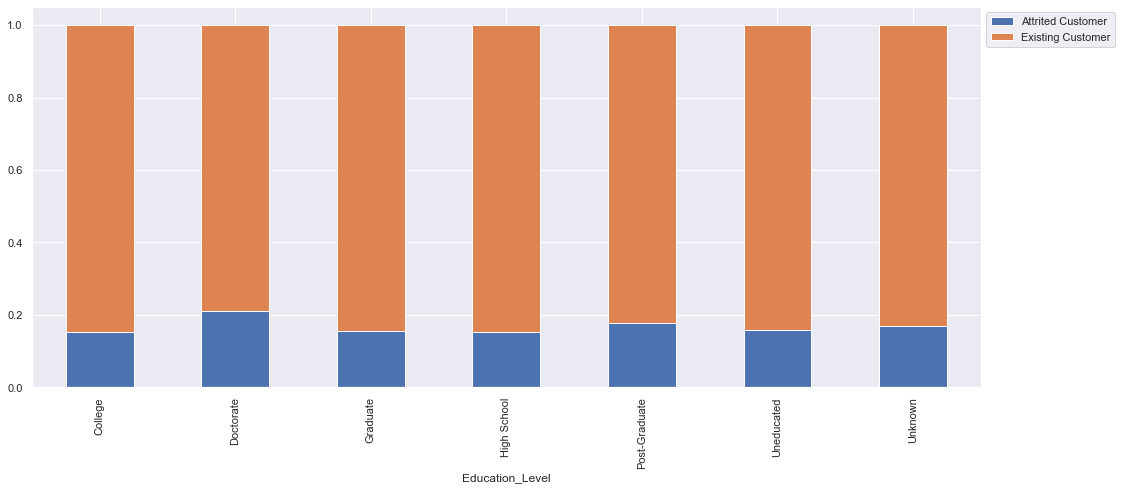

In [37]:
stacked_plot(data['Education_Level'])

* It is interesting to note that percentage of attrited customers is higher for Doctorates and Post Graduates.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


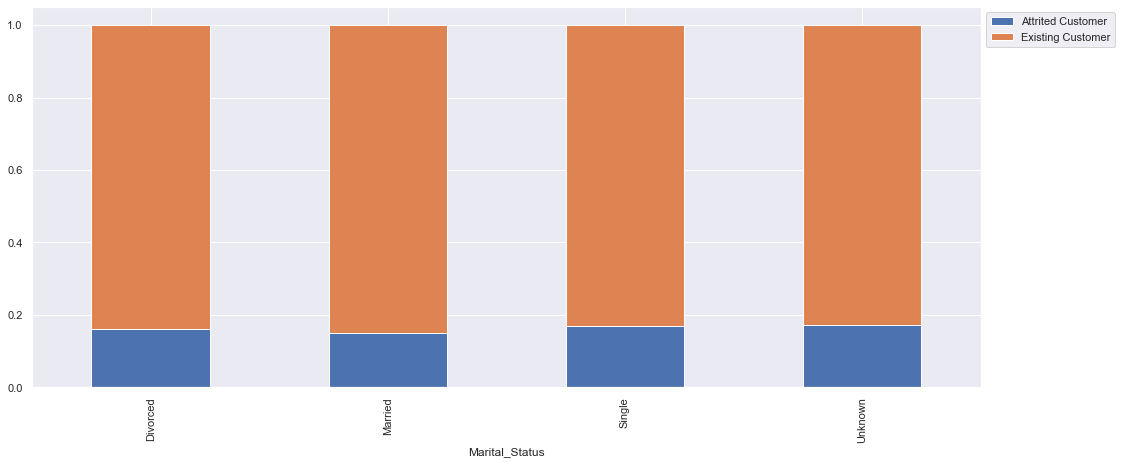

In [38]:
stacked_plot(data['Marital_Status'])

* Percentage of attrited customers is slightly lower for married customers

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


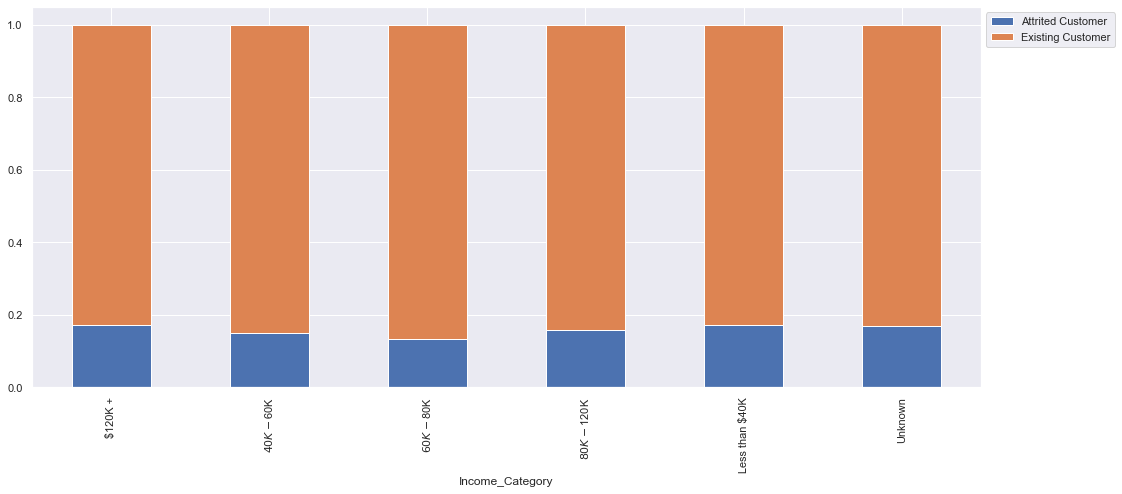

In [39]:
stacked_plot(data['Income_Category'])

* Percentage of attrited customers is slightly higher for customers with income 120K+

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


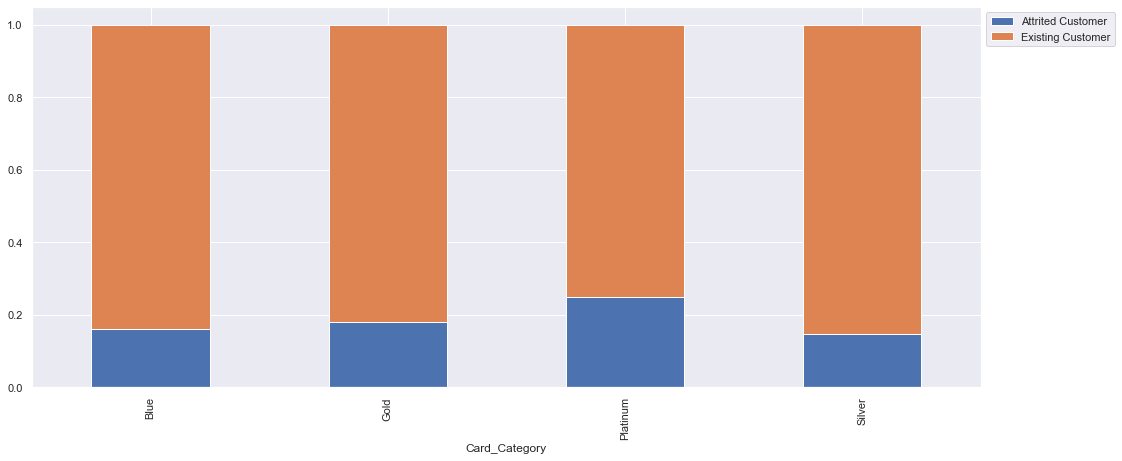

In [40]:
stacked_plot(data['Card_Category'])

* Percentage of attrited customers is higher for customers with Platinum card. Since there are only 15 instances of platinum card, this observation can't be taken seriously

In [41]:
from fast_ml import eda

**1. Plot for Customer_Age**

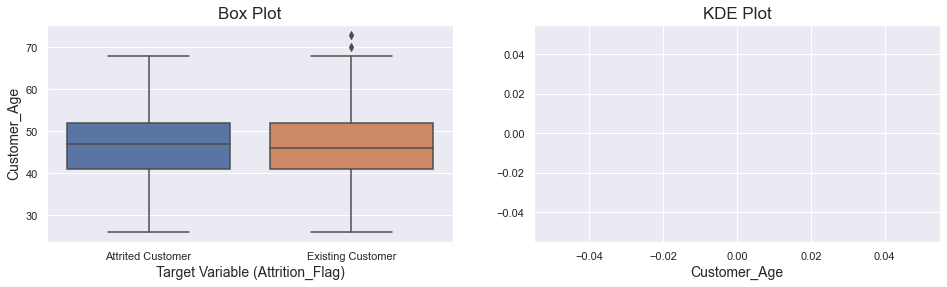

**2. Plot for Dependent_count**

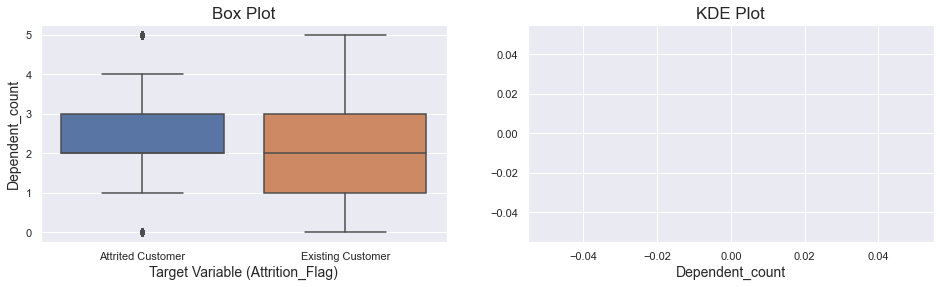

**3. Plot for Months_on_book**

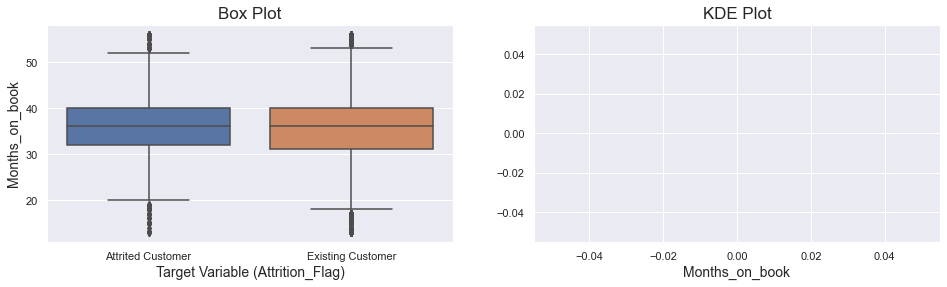

**4. Plot for Total_Relationship_Count**

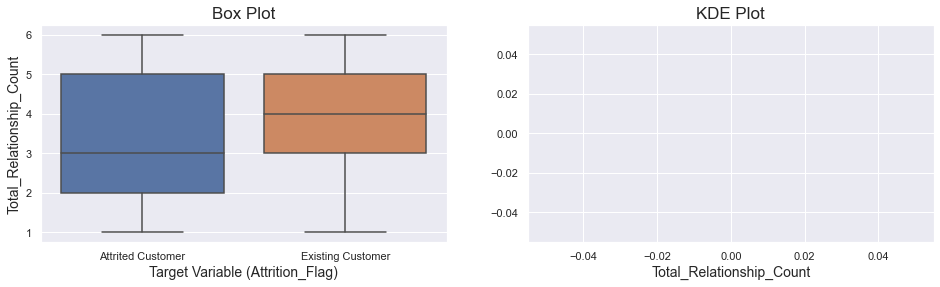

**5. Plot for Months_Inactive_12_mon**

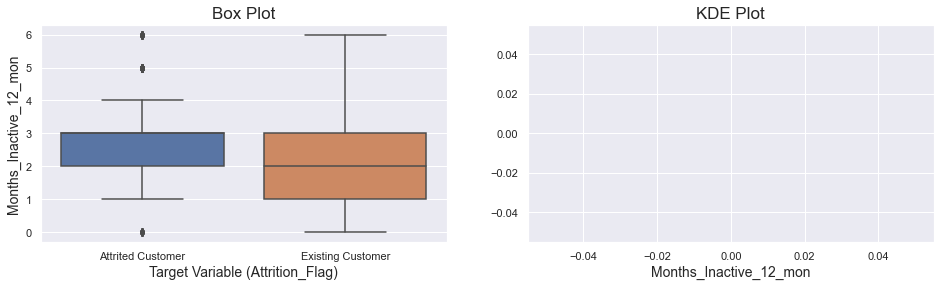

**6. Plot for Contacts_Count_12_mon**

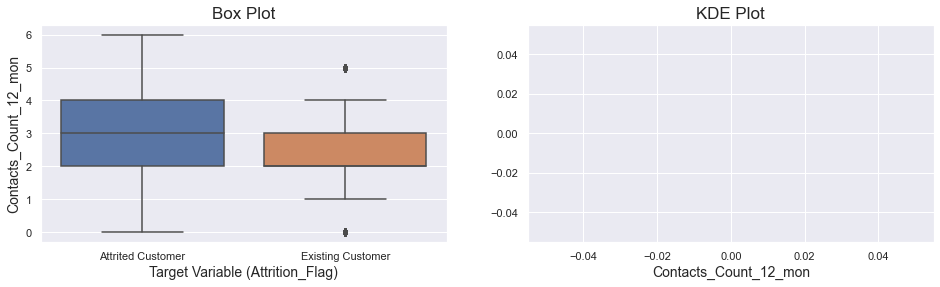

**7. Plot for Credit_Limit**

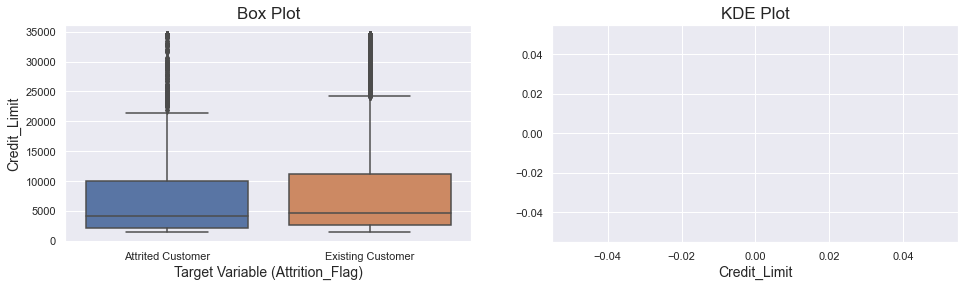

**8. Plot for Total_Revolving_Bal**

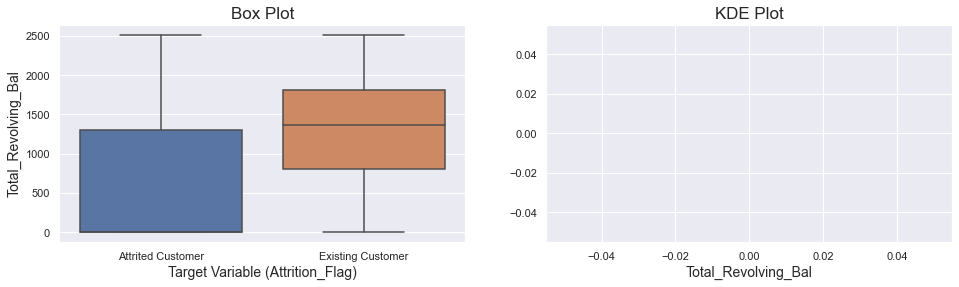

**9. Plot for Avg_Open_To_Buy**

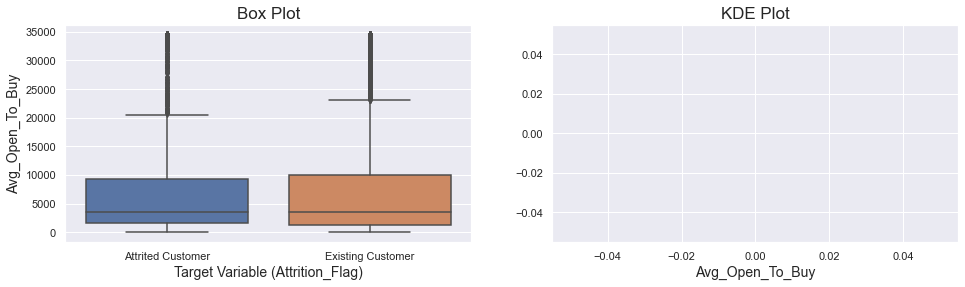

**10. Plot for Total_Amt_Chng_Q4_Q1**

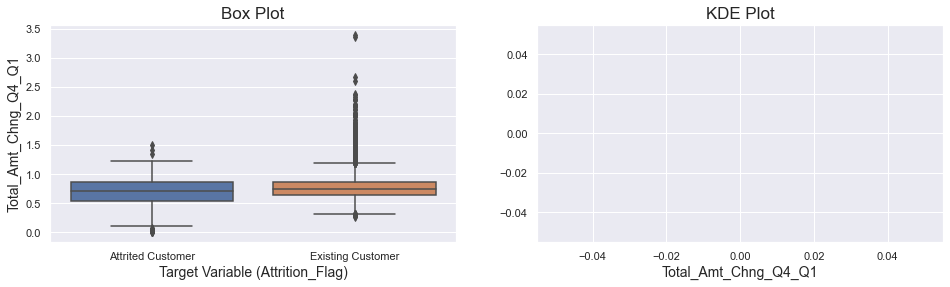

**11. Plot for Total_Trans_Amt**

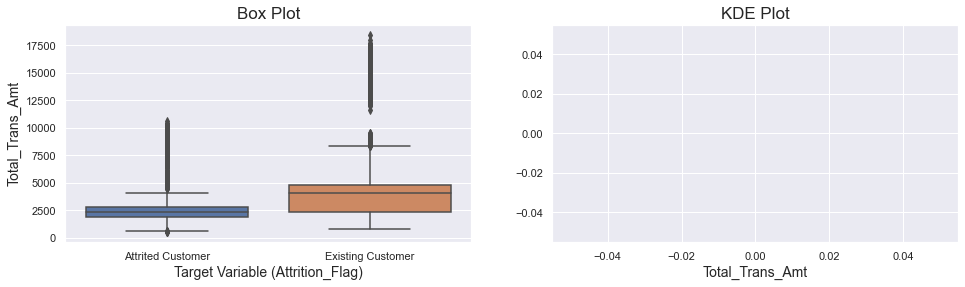

**12. Plot for Total_Trans_Ct**

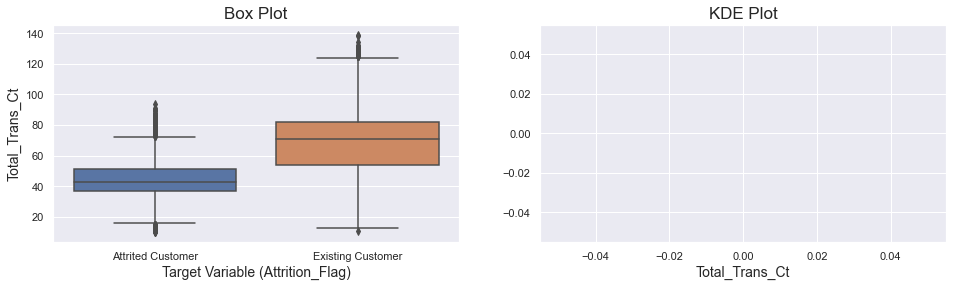

**13. Plot for Total_Ct_Chng_Q4_Q1**

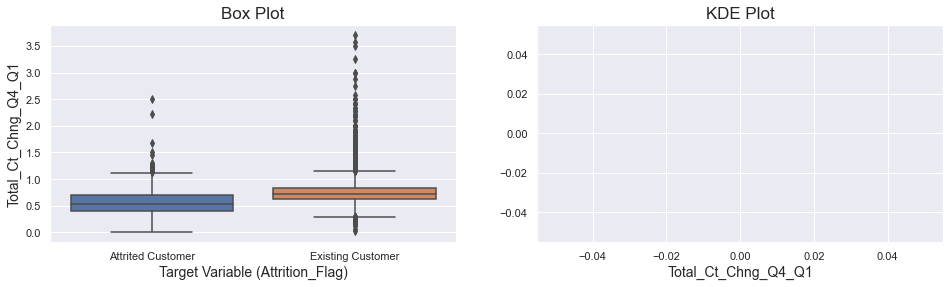

**14. Plot for Avg_Utilization_Ratio**

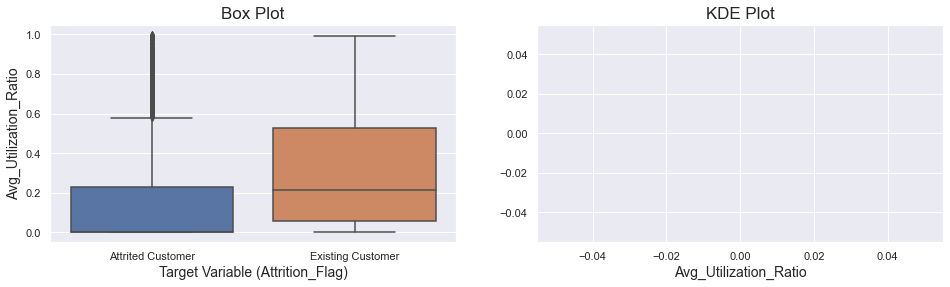

In [42]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
eda.numerical_plots_with_target(data, num_cols, 'Attrition_Flag', model_type='clf')

In [43]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of existing customers')
    sns.distplot(data[(data[target] == 'Existing Customer')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title("Distribution of attrited customers")
    sns.distplot(data[(data[target] == 'Attrited Customer')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Attrition_Flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Attrition_Flag - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow') #turning off outliers from boxplot
    plt.tight_layout()
    plt.show()

In [44]:
data['Attrition_Flag'] = data['Attrition_Flag'].astype('str')

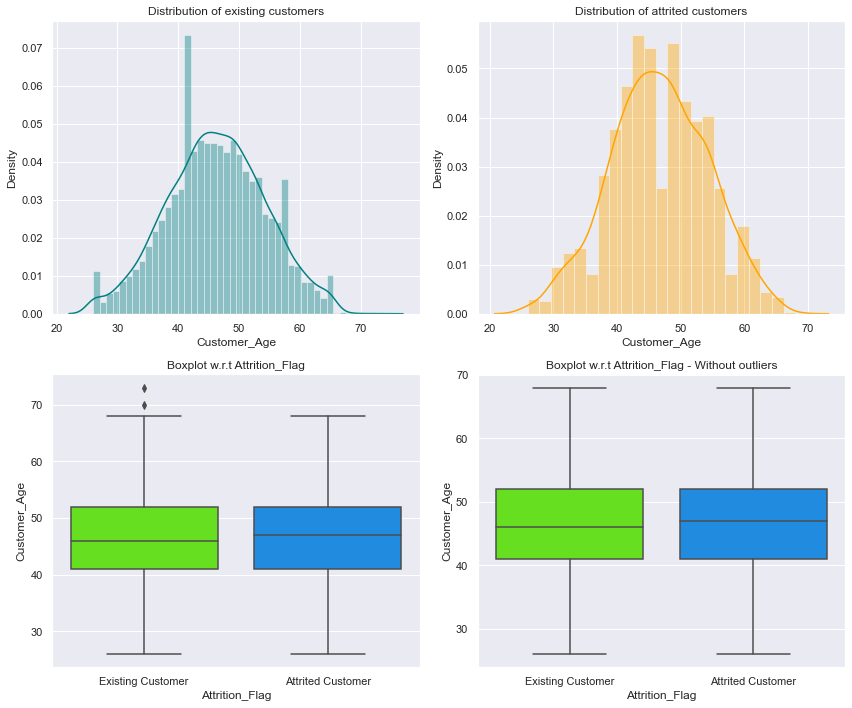

In [45]:
plot('Customer_Age')

* The graph is normally distributed.
* It doesn't look like it's possible to separate existing and attrited customers from the age

In [46]:
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

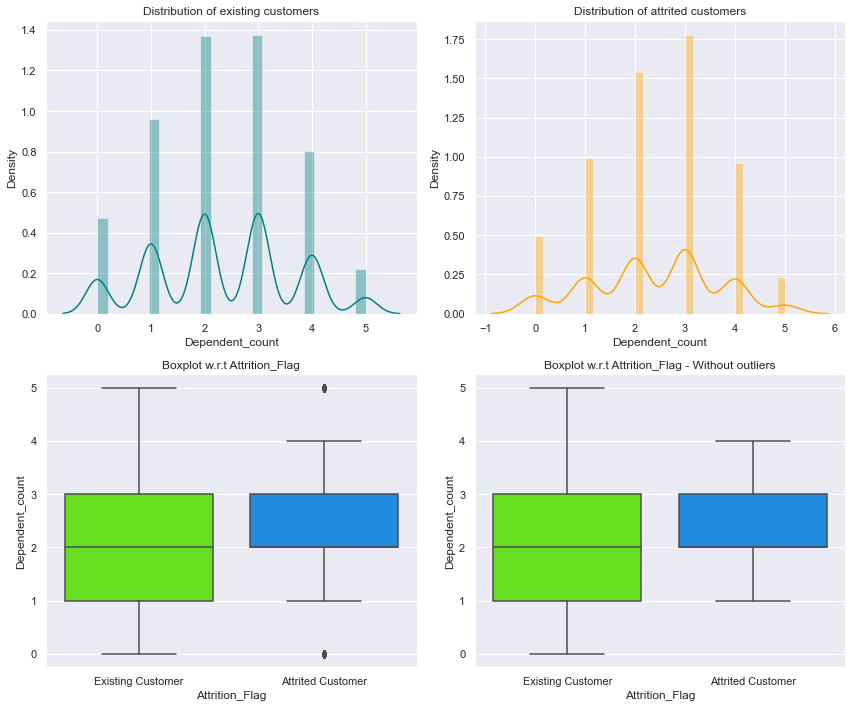

In [47]:
plot('Dependent_count')

* Majority of the attrited customers have dependents

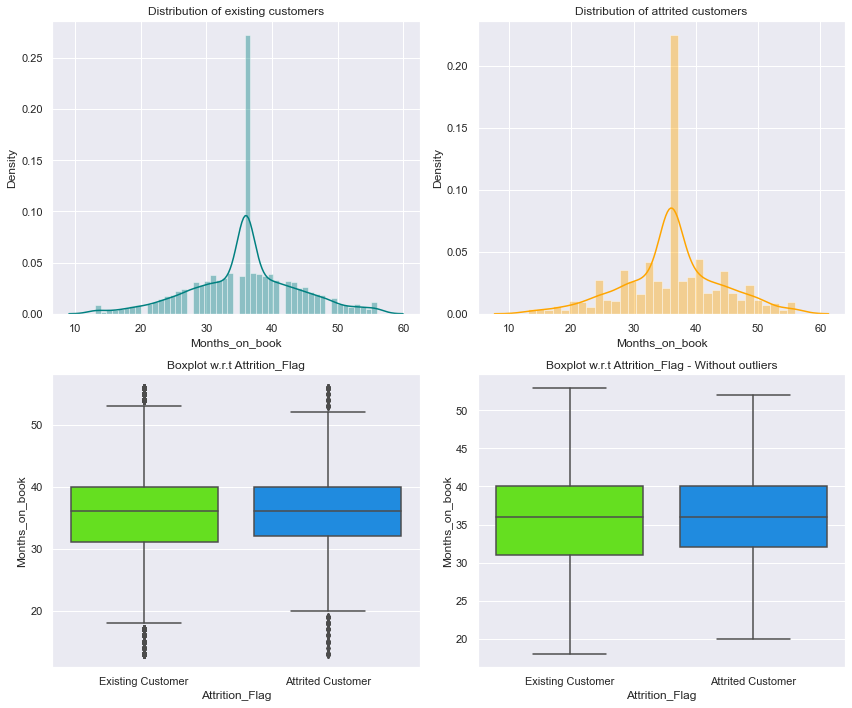

In [48]:
plot('Months_on_book')

* It looks like Months_On_Book for attrited customers is slightly higher but it's not possible to separate existing and attrited customers from the Months_On_Book.

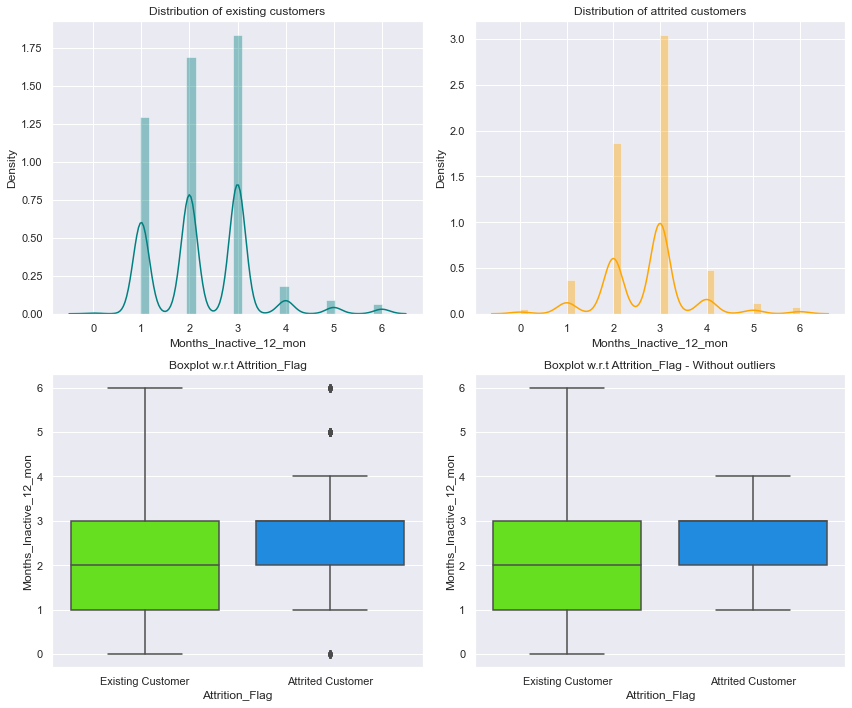

In [49]:
plot('Months_Inactive_12_mon')

* Attrited customers are inactive for atleast one month in the last 12 months which is not the case for exisiting customers
* Majority of the attrited customers are inactive for 3 months. 

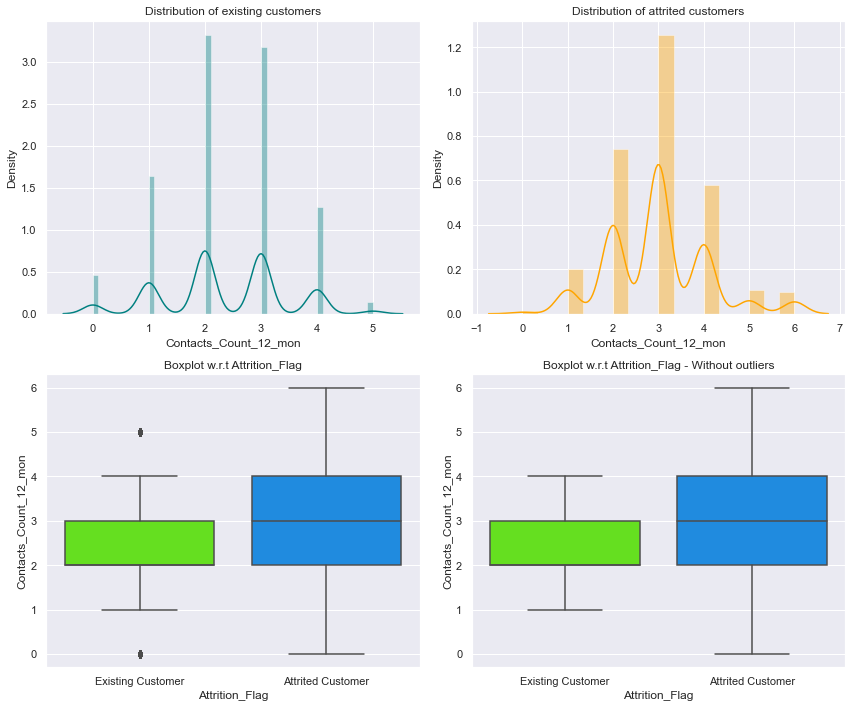

In [50]:
plot('Contacts_Count_12_mon')

* Number of contact seems lesser for existing customers

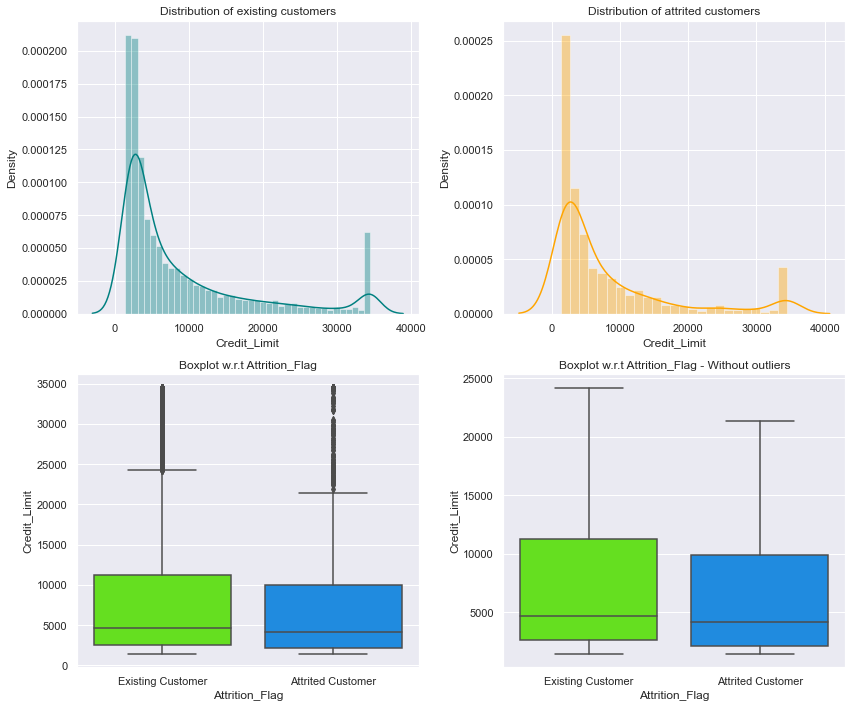

In [51]:
plot('Credit_Limit')

* Credit_Limit for Existing customers seems to be slightly higher for exisiting customers but the difference is not significant.

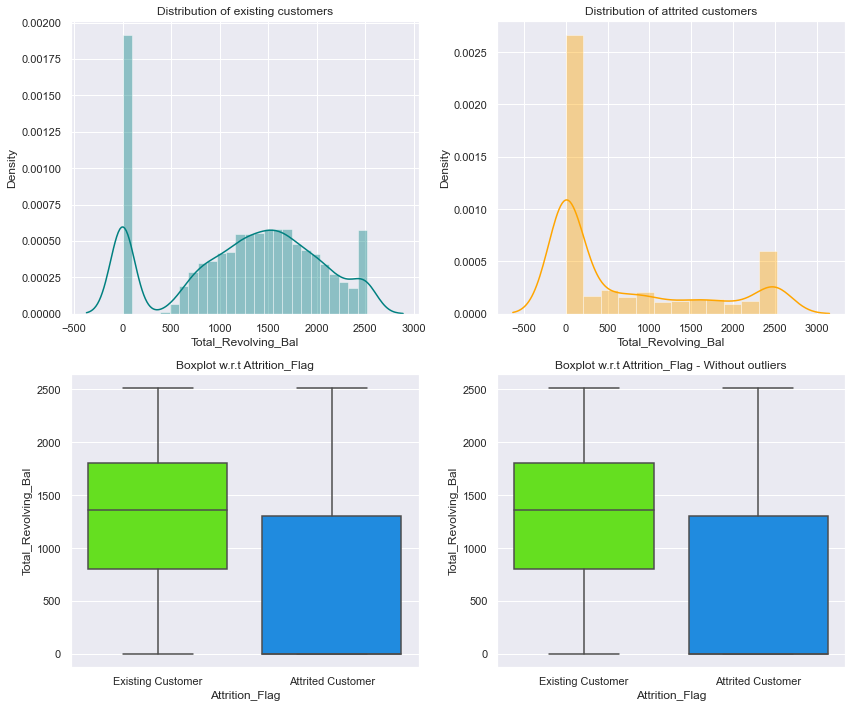

In [52]:
plot('Total_Revolving_Bal')

* Clearly total revolving balance is lower for attrited customers

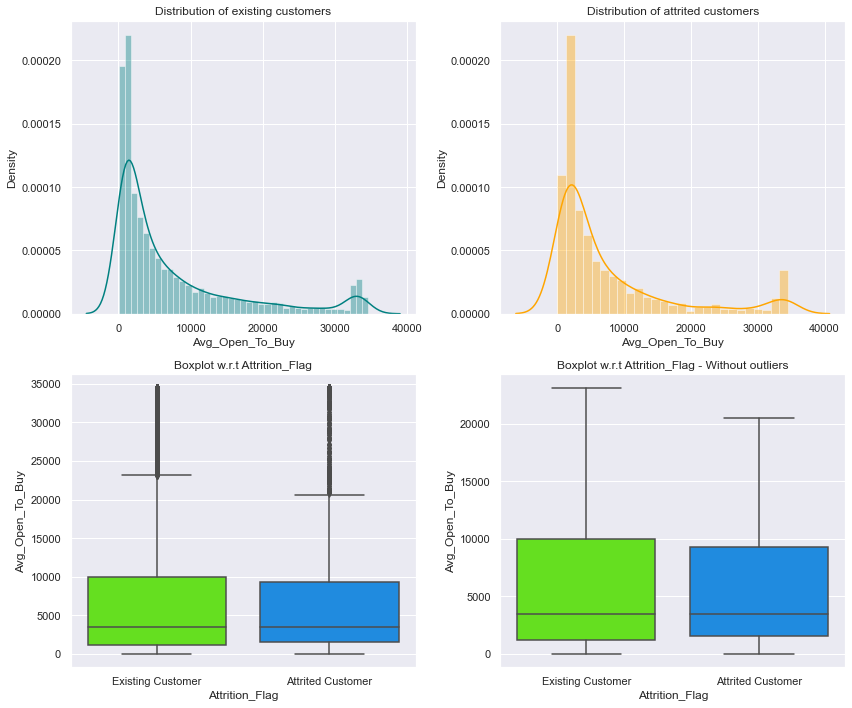

In [53]:
plot('Avg_Open_To_Buy')

* Graphs are mostly overlapped. There is no significant difference between Attrited and Existing customers

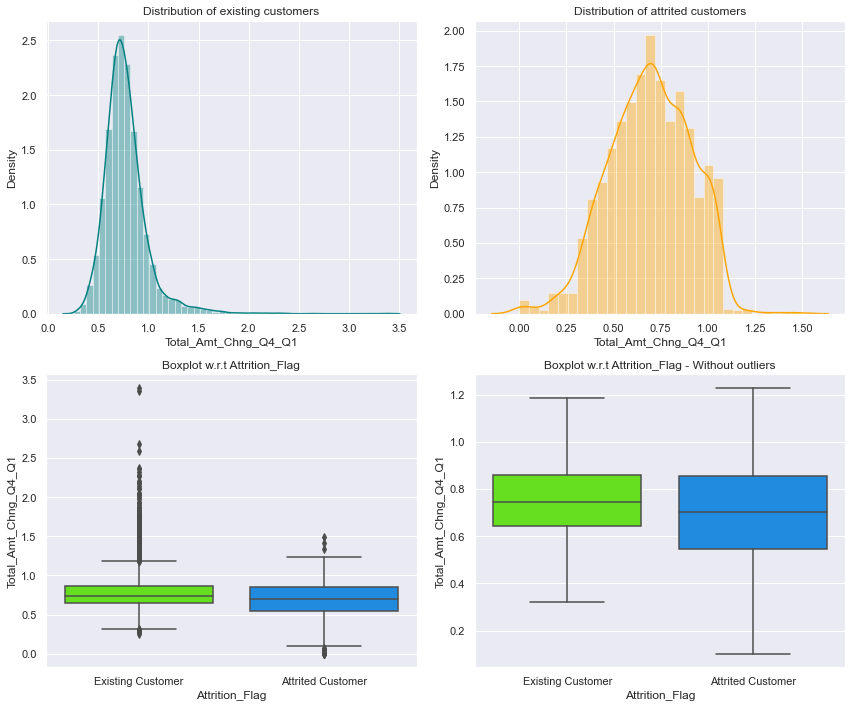

In [54]:
plot('Total_Amt_Chng_Q4_Q1')

* The value seems to be somewhat lower for attrited customers

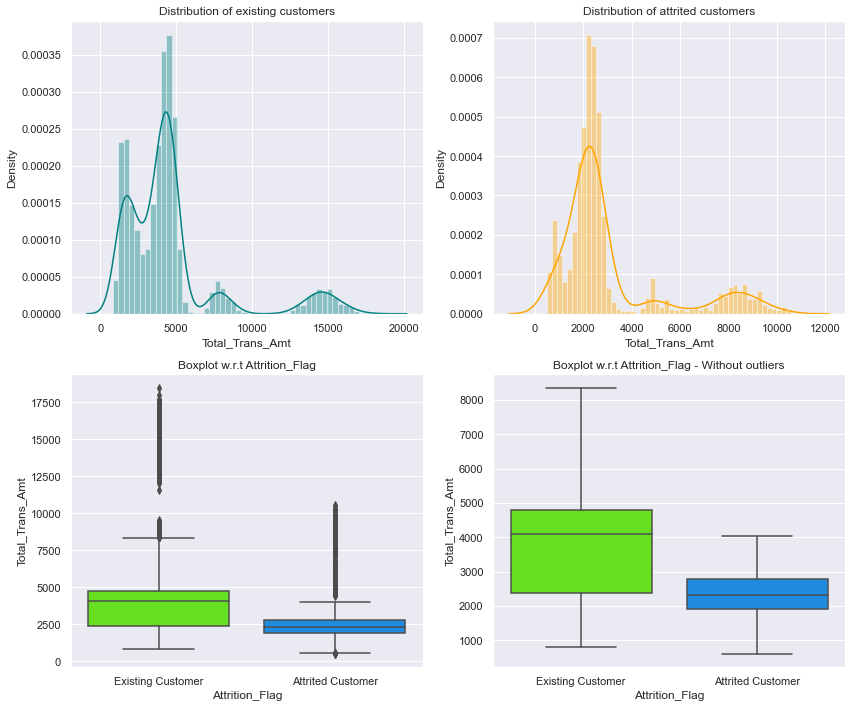

In [55]:
plot('Total_Trans_Amt')

* Total transactiona amount is clearly lower for attrited customets

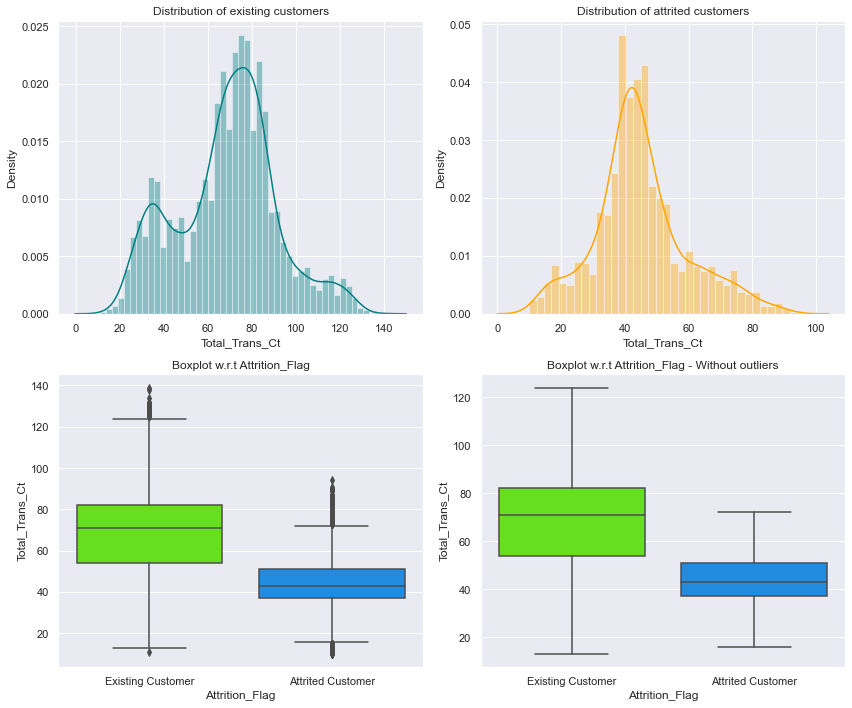

In [56]:
plot('Total_Trans_Ct')

* Total transactions count is clearly lower for attrited customers

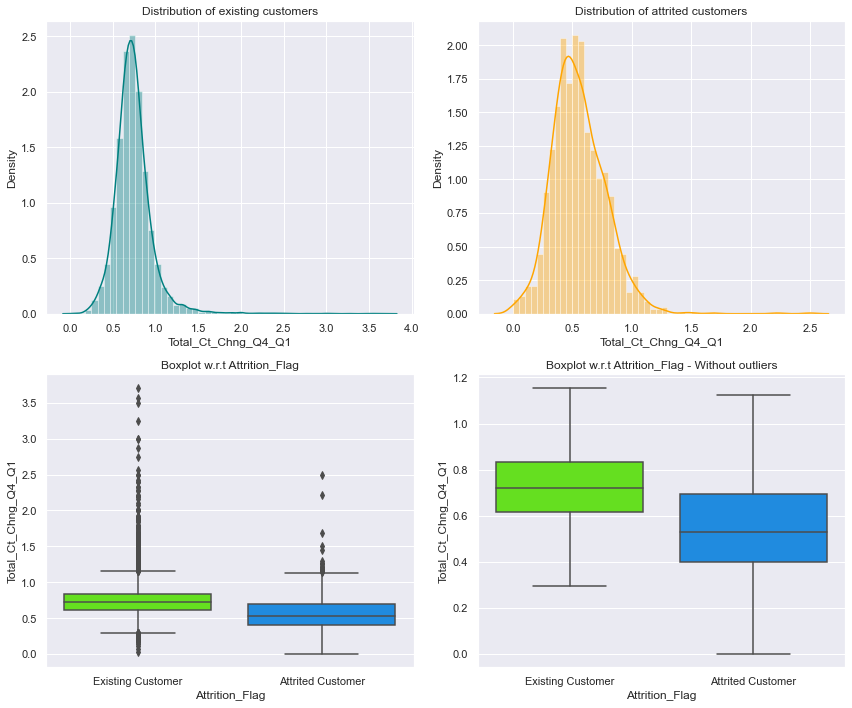

In [57]:
plot('Total_Ct_Chng_Q4_Q1')

* The value seems to be lesser for Attrited customers

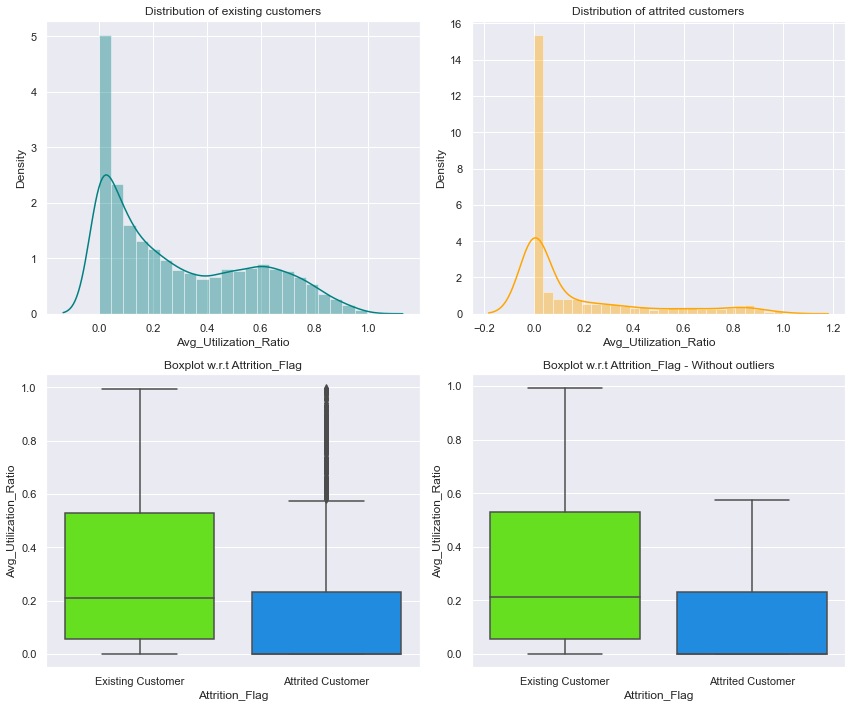

In [58]:
plot('Avg_Utilization_Ratio')

* Avg_Utilization_Ratio is clearly lesser for attrited customers

In [59]:
# sns.pairplot(data, hue='Attrition_Flag')

In [60]:
data.sample(n=5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4880,Existing Customer,49,F,1,Graduate,Married,$40K - $60K,Blue,36,5,3,1,2721.0,1527,1194.0,0.743,4622,88,0.725,0.561
644,Existing Customer,33,M,2,Unknown,Married,$60K - $80K,Blue,25,6,3,3,6242.0,491,5751.0,1.054,2187,59,0.405,0.079
1191,Existing Customer,40,M,5,Graduate,Single,$60K - $80K,Blue,27,6,1,2,2742.0,1416,1326.0,0.761,1539,38,1.111,0.516
7701,Existing Customer,57,F,0,Graduate,Married,Less than $40K,Blue,45,6,1,2,2448.0,0,2448.0,0.606,5464,98,0.607,0.000
2668,Existing Customer,52,M,2,College,Married,$120K +,Blue,47,3,3,2,27347.0,719,26628.0,0.695,4040,77,0.674,0.026


### Outlier detection

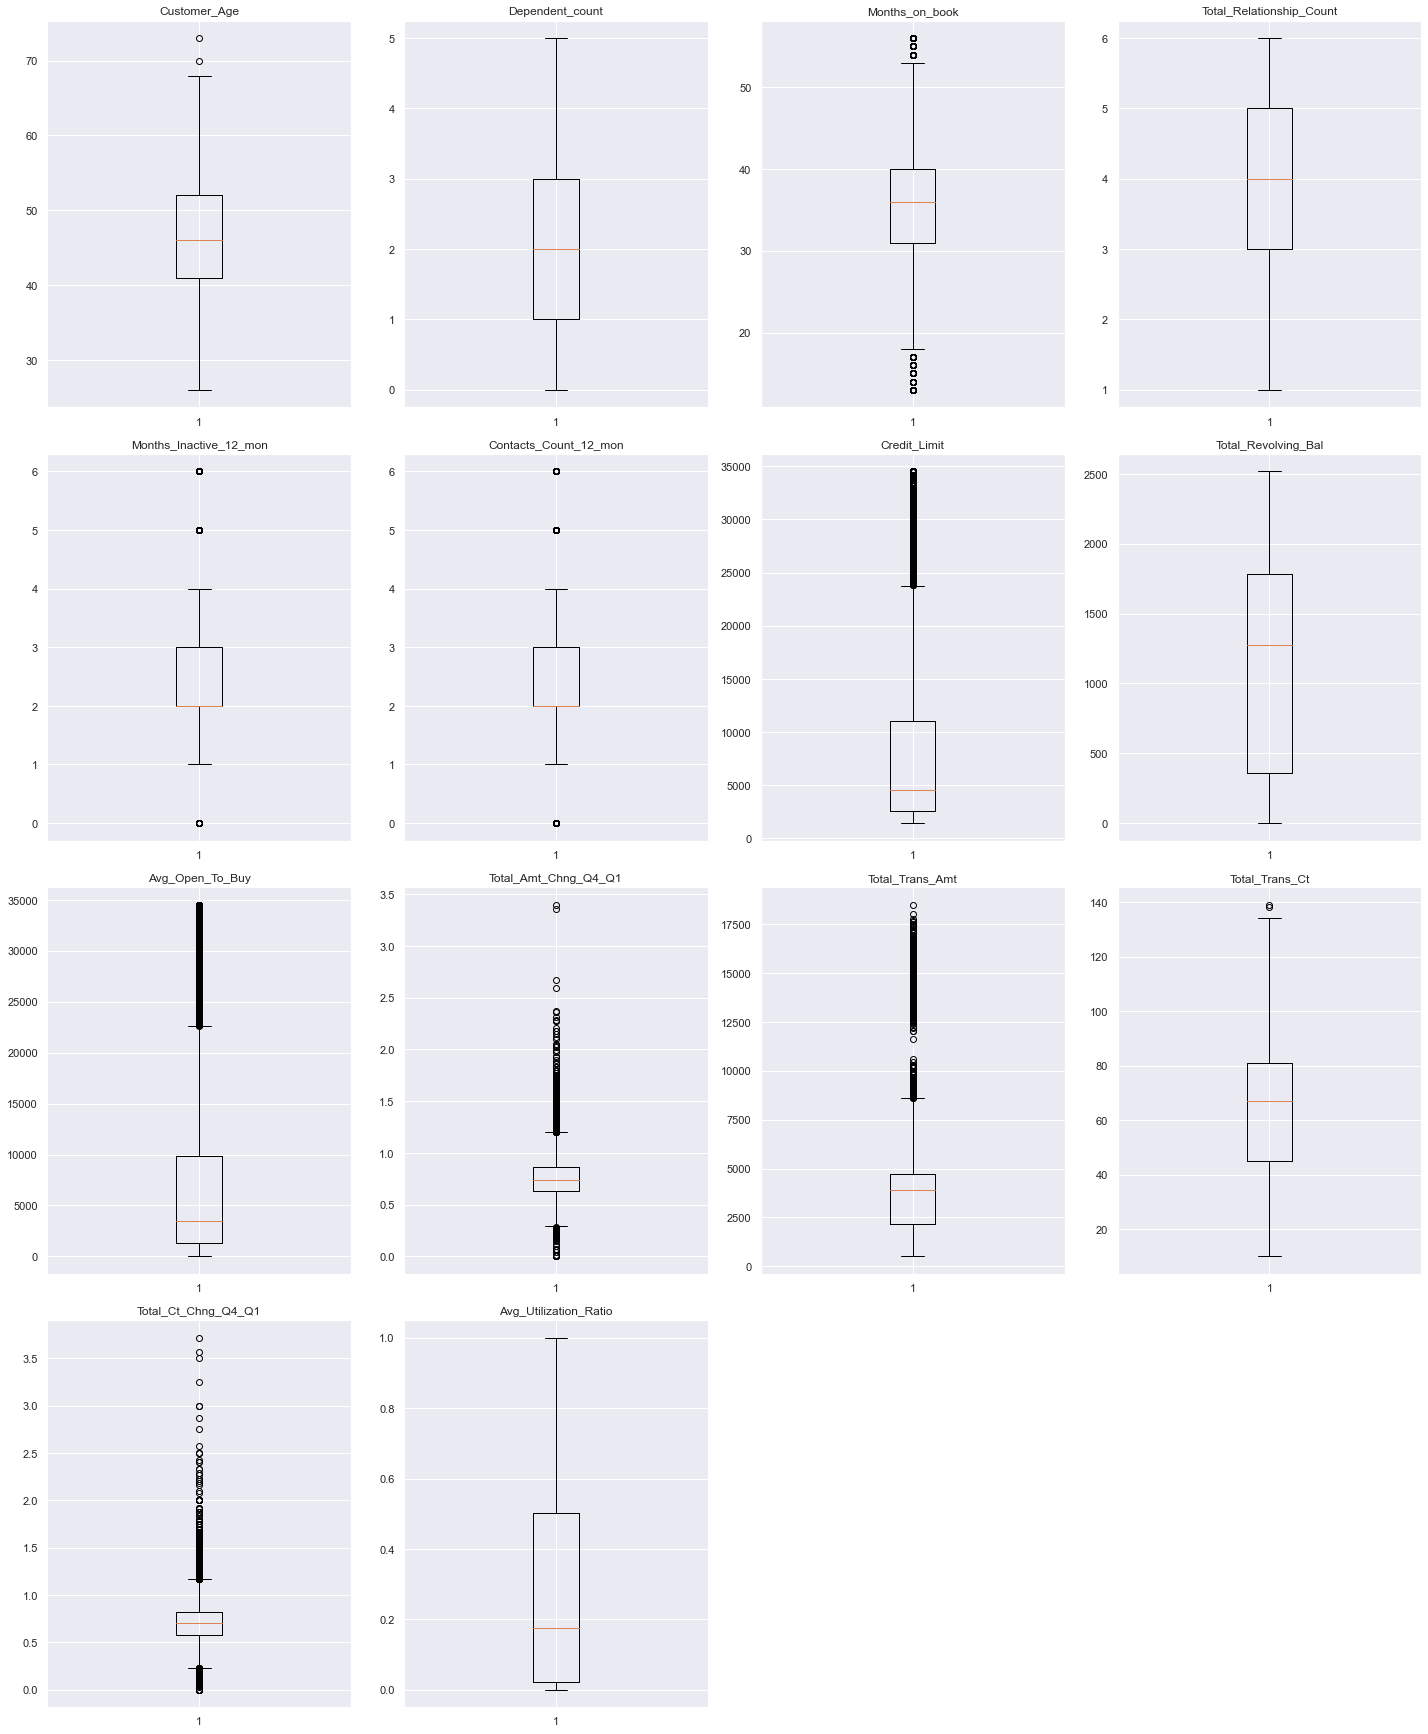

In [61]:
# outlier detection using boxplot
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* There are outliers in Months_On_Book, Months_Inactive_12_mon, Contacts_count_12mon_, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1

#### Since dropping outliers might lead to lose important information in the data, let's not immediately drop them. We can first try to perform a log transformation on the data and pull in the higher numbers.

In [62]:
data_lr = data.copy()

In [63]:
for col in ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']:
    data_lr[col] = np.log(data_lr[col]+1)

In [64]:
data_lr.sample(n=5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8038,Existing Customer,61,F,2,Graduate,Single,Less than $40K,Blue,45,2,1.098612,1.386294,7.864420,1441,7.057898,0.532978,8.484463,85,0.551007,0.554
530,Existing Customer,48,F,3,Graduate,Divorced,Less than $40K,Blue,40,3,1.098612,1.386294,8.044947,1603,7.323171,0.773344,7.271009,37,0.475613,0.514
3054,Existing Customer,38,M,3,Graduate,Single,$80K - $120K,Blue,31,6,0.693147,1.098612,9.520615,0,9.520615,0.448525,8.195885,73,0.506215,0.000
3499,Existing Customer,46,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,0.693147,1.098612,8.610684,1189,8.366603,0.667829,8.075894,64,0.632335,0.217
9897,Attrited Customer,31,F,1,Graduate,Single,Less than $40K,Blue,13,1,0.693147,1.386294,8.482602,0,8.482602,0.607589,9.022443,65,0.618962,0.000


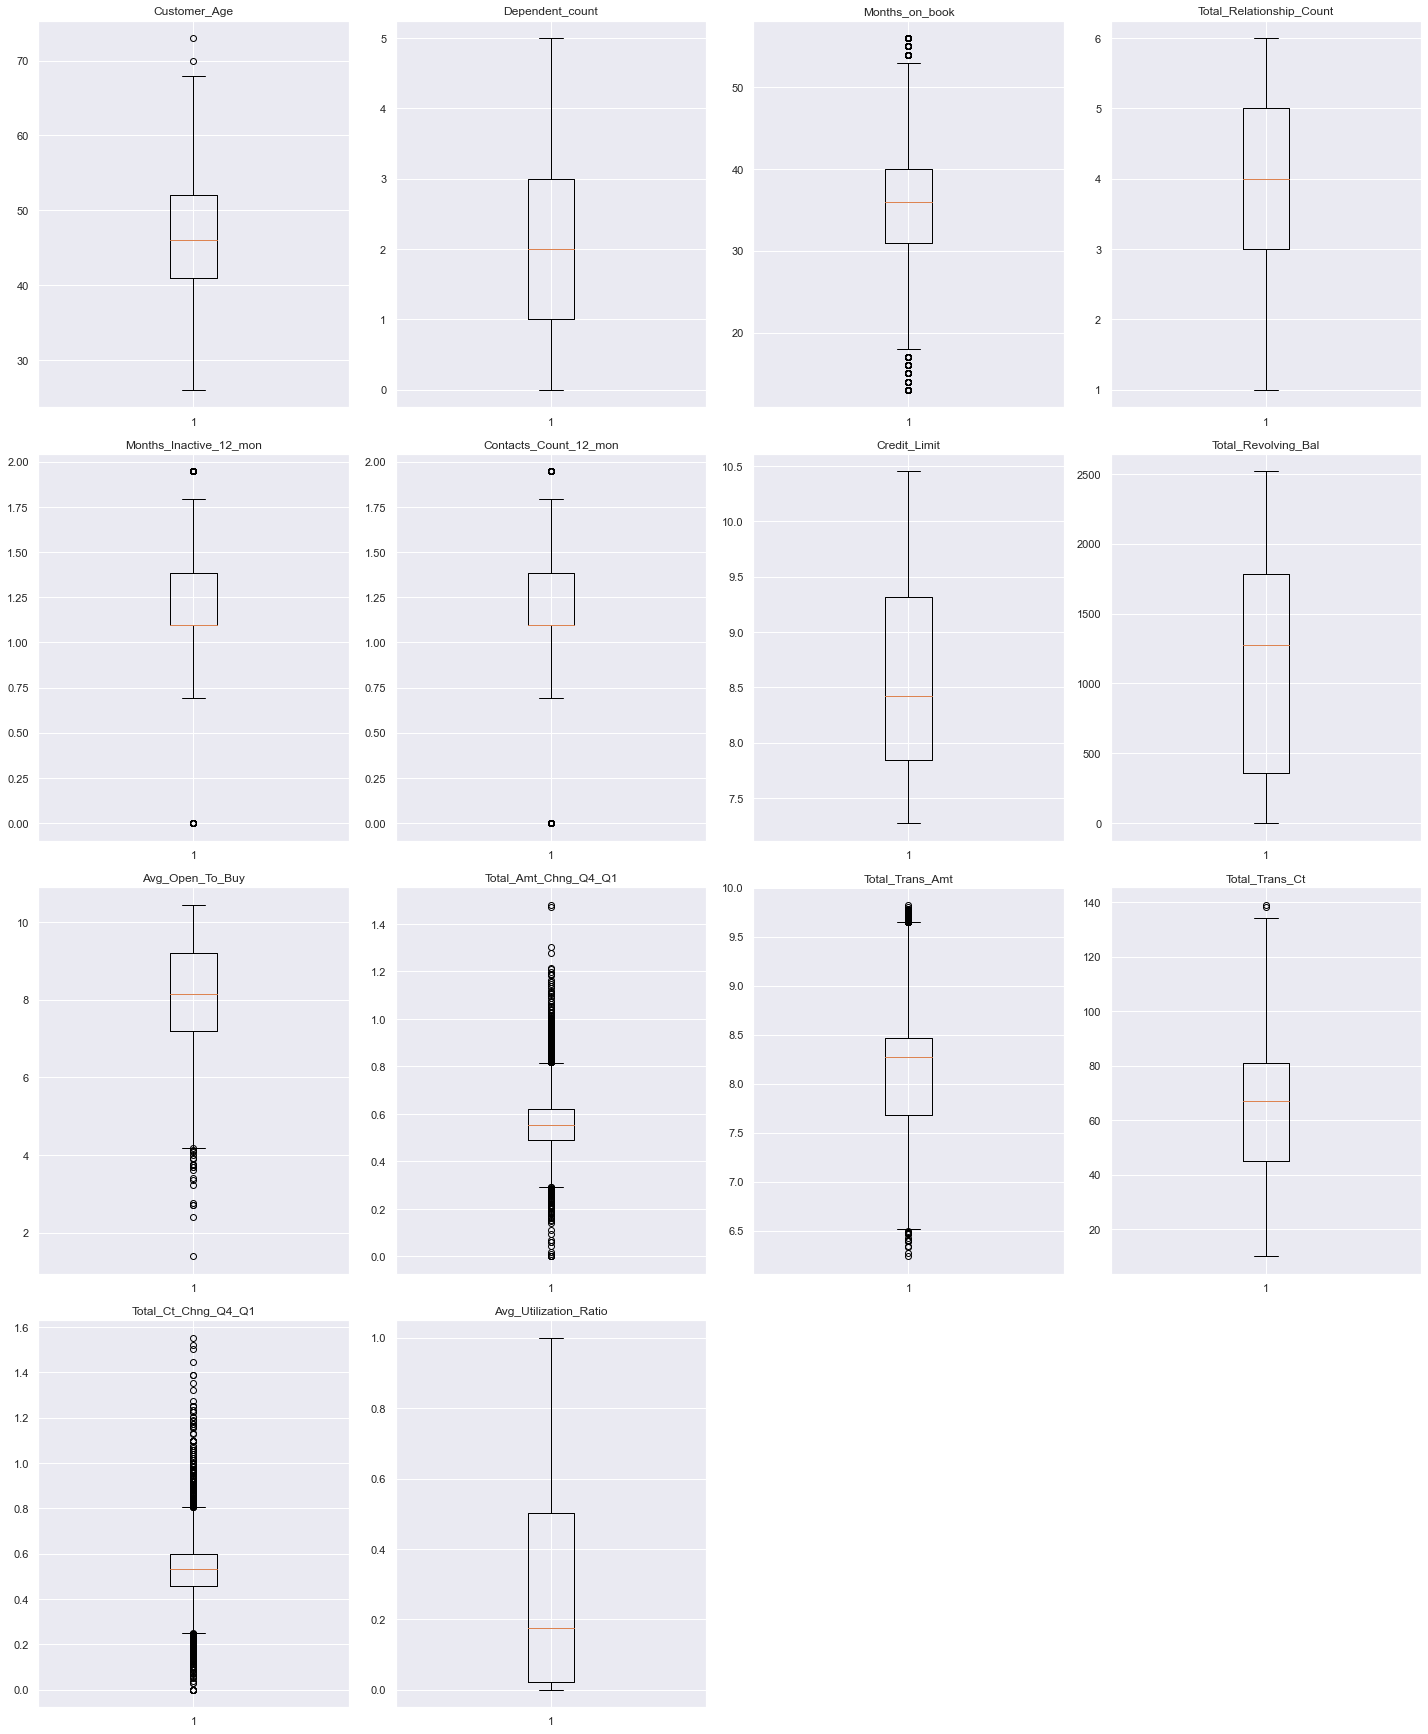

In [65]:
# outlier detection using boxplot
numerical_col = data_lr.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data_lr[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* The transformed graphs looks a lot better w.r.t outliers. Only Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 seems have extreme outliers. Let's treat these 2 columns

In [66]:
# Treat outliers by flooring and capping
def treat_outlier(df, col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    cap = Q3 + 1.5*IQR
    floor = Q1 - 1.5*IQR
    df[col] = np.clip(df[col], floor, cap) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                           # and all the values above upper_whishker will be assigned value of upper_whishker

def treat_all_outliers(df):
    num_col = df.select_dtypes(include=np.number).columns.tolist()
    for col in num_col:
        treat_outlier(df, col)
    return df

In [67]:
data_lr = treat_all_outliers(data_lr)

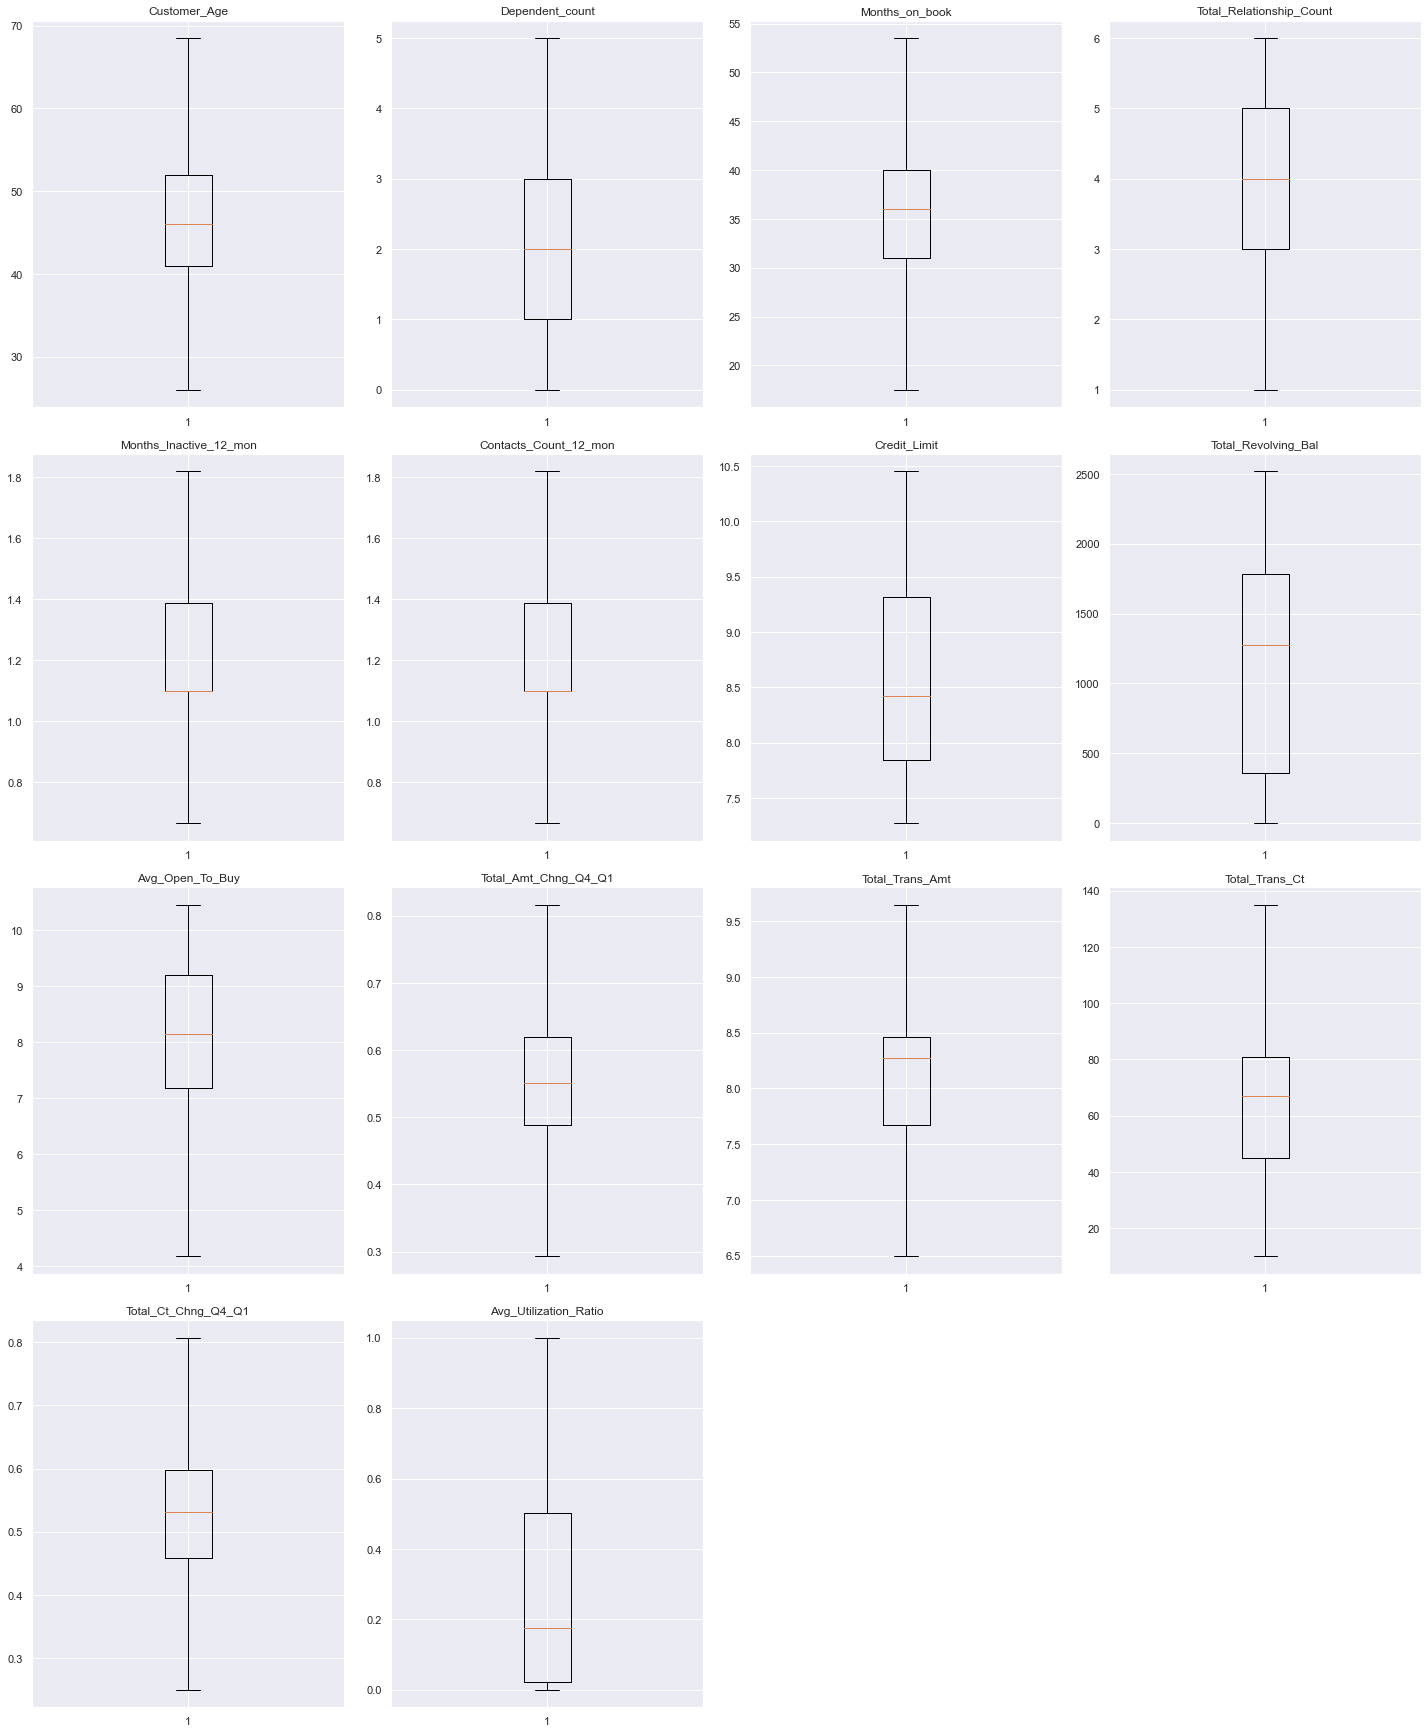

In [68]:
numerical_col = data_lr.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data_lr[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [69]:
attrition = {'Existing Customer': 0, 'Attrited Customer': 1}
data_lr['Attrition_Flag'] = data_lr['Attrition_Flag'].map(attrition)

#### Outliers are now treated. There are no outliers in the dataset

In [70]:
# Splitting the data into train and test sets
# Separating target variable and other variables
X = data_lr.drop(columns="Attrition_Flag")
Y = data_lr["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [71]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 32) (3039, 32)


## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting if the customer is going to churn but he doesn't
2. Predicting if the customer is not going to churn but he does

### Which case is more important? 
* Predicting if the customer is not going to churn but he does. This results in losing a customer.  

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1).


### Logistic regression

In [72]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1))])

In [73]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [74]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [75]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=1))])

In [78]:
get_metrics_score(pipe)

Accuracy on training set :  0.9173250564334086
Accuracy on test set :  0.9157617637380717
Recall on training set :  0.646180860403863
Recall on test set :  0.6618852459016393
Precision on training set :  0.8008705114254625
Precision on test set :  0.7801932367149759


[0.9173250564334086,
 0.9157617637380717,
 0.646180860403863,
 0.6618852459016393,
 0.8008705114254625,
 0.7801932367149759]

* Logistic Regression has given a generalized performance on training and test set.

### Oversampling train data using SMOTE

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 



In [83]:
pipe.fit(X_train_over, y_train_over)
get_metrics_score(pipe)

Accuracy on training set :  0.902793453724605
Accuracy on test set :  0.9002961500493584
Recall on training set :  0.694468832309043
Recall on test set :  0.7090163934426229
Precision on training set :  0.6987632508833922
Precision on test set :  0.6824457593688363


[0.902793453724605,
 0.9002961500493584,
 0.694468832309043,
 0.7090163934426229,
 0.6987632508833922,
 0.6824457593688363]

* Recall has improved after upsampling the minority class using SMOTE

#### Regularization is not required here because the model is not overfitting and is giving the generalized performance on both train and test data sets.

### Undersampling train data using SMOTE

In [84]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [85]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 



In [86]:
pipe.fit(X_train_un, y_train_un)
get_metrics_score(pipe)

Accuracy on training set :  0.8658295711060948
Accuracy on test set :  0.8558736426456071
Recall on training set :  0.8533801580333626
Recall on test set :  0.8709016393442623
Precision on training set :  0.5535307517084282
Precision on test set :  0.53125


[0.8658295711060948,
 0.8558736426456071,
 0.8533801580333626,
 0.8709016393442623,
 0.5535307517084282,
 0.53125]

* Recall is highly improved by undersampling the data 

In [89]:
from xgboost import XGBClassifier
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 76.03176443310919
GBM: 84.02001700285957
ADB: 83.84457840636837
XGB: 87.18100316871474
DTREE: 78.39825334260763


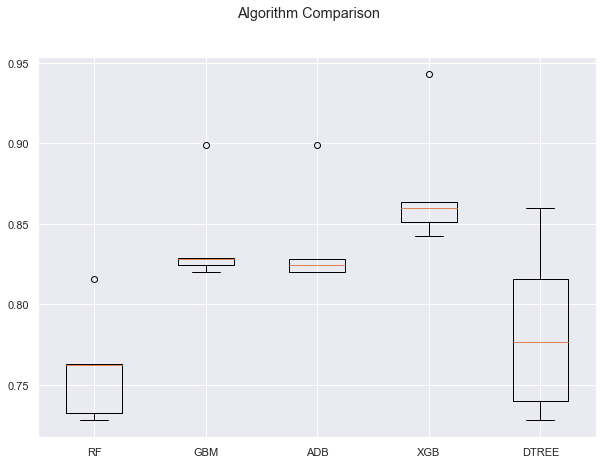

In [90]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### XGBoost is giving the highest recall followed by Gradient Boosting model and Adaboosting.

#### Let's try to improve the performance of top 3 models - XGBoost, Gradient Boosting and Ada Boost

#### GridSearch CV - Adaboost

In [91]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 80} 
Score: 0.8683205811886545
CPU times: user 4.14 s, sys: 823 ms, total: 4.96 s
Wall time: 4min 2s


Accuracy on training set :  0.9880079006772009
Accuracy on test set :  0.9690687726225732
Recall on training set :  0.9525899912203687
Recall on test set :  0.8872950819672131
Precision on training set :  0.9722222222222222
Precision on test set :  0.9173728813559322


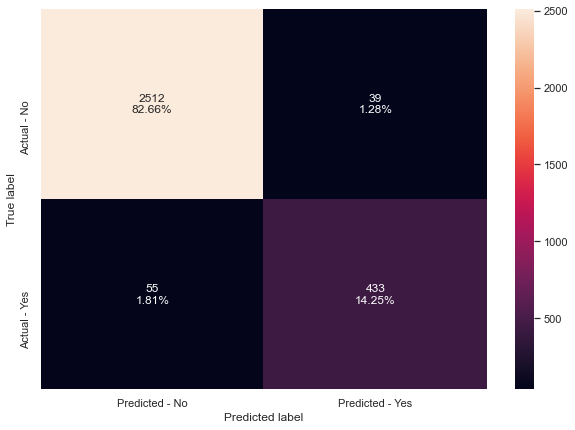

In [92]:
# Calculating different metrics
get_metrics_score(grid_cv.best_estimator_)

# Creating confusion matrix
make_confusion_matrix(grid_cv.best_estimator_, y_test)

#### RandomSearchCV - Adaboost

In [96]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 100, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8674549810649973:
CPU times: user 2min 28s, sys: 1.3 s, total: 2min 29s
Wall time: 2min 31s


Accuracy on training set :  0.9971783295711061
Accuracy on test set :  0.9641329384666009
Recall on training set :  0.9938542581211589
Recall on test set :  0.8852459016393442
Precision on training set :  0.988646288209607
Precision on test set :  0.8907216494845361


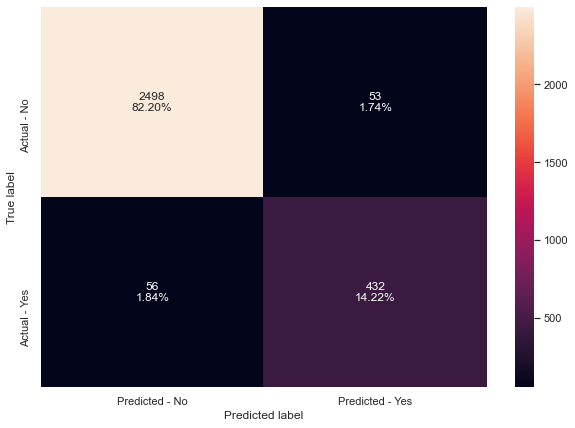

In [97]:
# Calculating different metrics
get_metrics_score(random_cv.best_estimator_)

# Creating confusion matrix
make_confusion_matrix(random_cv.best_estimator_, y_test)

#### GridSearch CV - GBM

In [98]:
%%time

# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

experimental_init_estimator = DecisionTreeClassifier(class_weight='balanced',
                                                                   max_depth=2,
                                                                   max_leaf_nodes=5,
                                                                   min_impurity_decrease=0.0001,
                                                                   random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features': [0.7,0.3,'log2','auto', None],
              'learning_rate': [1, 0.5, 0.1, 0.05],
              'init': [experimental_init_estimator, None],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

CPU times: user 9h 55min 27s, sys: 2min 41s, total: 9h 58min 9s
Wall time: 20h 38min 30s


GradientBoostingClassifier(init=DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=2,
                                                       max_leaf_nodes=5,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1),
                           learning_rate=0.5, max_features='auto',
                           n_estimators=150, random_state=1, subsample=0.9)

Accuracy on training set :  1.0
Accuracy on test set :  0.9740046067785456
Recall on training set :  1.0
Recall on test set :  0.9118852459016393
Precision on training set :  1.0
Precision on test set :  0.9251559251559252


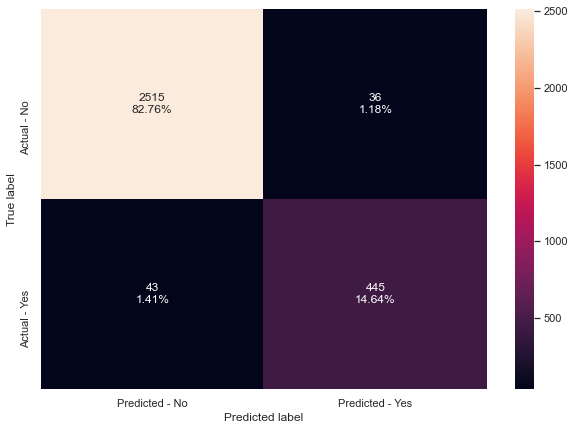

In [100]:
# Calculating different metrics
get_metrics_score(gb_tuned)

# Creating confusion matrix
make_confusion_matrix(gb_tuned, y_test)

#### RandomSearch CV - GBM

In [111]:
%%time

# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

experimental_init_estimator = DecisionTreeClassifier(class_weight='balanced',
                                                                   max_depth=2,
                                                                   max_leaf_nodes=5,
                                                                   min_impurity_decrease=0.0001,
                                                                   random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features': [0.7,0.3,'log2','auto', None],
              'learning_rate': [1, 0.5, 0.1, 0.05],
              'init': [experimental_init_estimator, None],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(gb_tuned, parameters, n_iter=50, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

CPU times: user 6min 27s, sys: 2.08 s, total: 6min 29s
Wall time: 6min 38s


GradientBoostingClassifier(init=DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=2,
                                                       max_leaf_nodes=5,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1),
                           learning_rate=1, max_depth=5, max_features='auto',
                           n_estimators=125, random_state=1, subsample=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9690687726225732
Recall on training set :  1.0
Recall on test set :  0.8934426229508197
Precision on training set :  1.0
Precision on test set :  0.9121338912133892


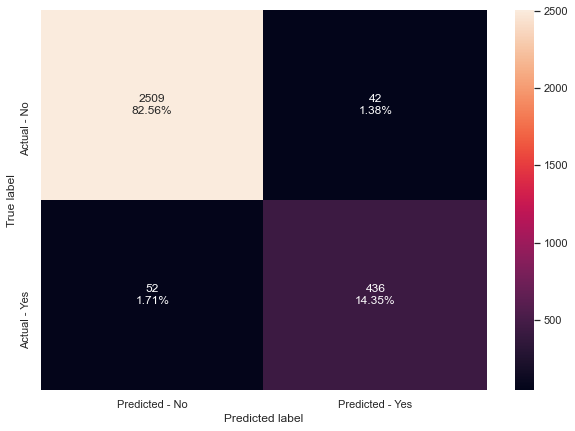

In [112]:
# Calculating different metrics
get_metrics_score(gb_tuned)

# Creating confusion matrix
make_confusion_matrix(gb_tuned, y_test)

#### GridSearch - XGBoost

In [114]:
%%time

# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100], 
              'subsample':[0.7, 0.8],
              'gamma':[0, 1],
              'colsample_bytree':[0.7, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

CPU times: user 2min 44s, sys: 1.41 s, total: 2min 45s
Wall time: 50.9 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=0)

Accuracy on training set :  0.9991534988713319
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9973661106233538
Recall on test set :  0.9139344262295082
Precision on training set :  0.9973661106233538
Precision on test set :  0.9158110882956879


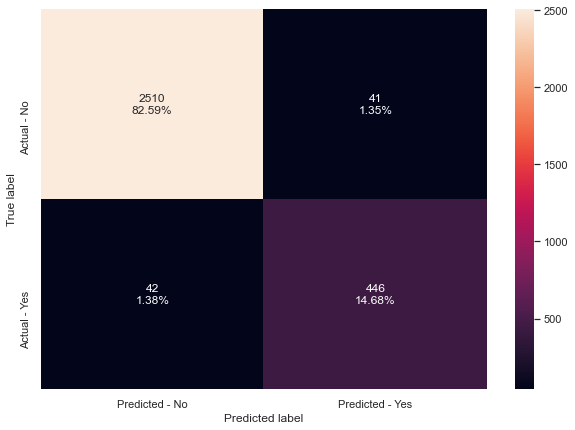

In [115]:
# Calculating different metrics
get_metrics_score(xgb_tuned)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

In [108]:
%%time

# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100], 
              'subsample':[0.7, 0.8],
              'gamma':[0, 1],
              'colsample_bytree':[0.7, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, parameters, n_iter=100, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_random_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_random_tuned.fit(X_train, y_train)

CPU times: user 2min 52s, sys: 1.5 s, total: 2min 54s
Wall time: 55.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=0)

Accuracy on training set :  0.9991534988713319
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9973661106233538
Recall on test set :  0.9139344262295082
Precision on training set :  0.9973661106233538
Precision on test set :  0.9158110882956879


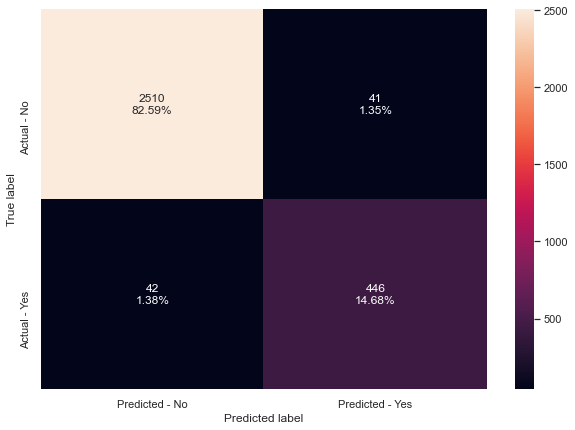

In [109]:
# Calculating different metrics
get_metrics_score(xgb_random_tuned)

# Creating confusion matrix
make_confusion_matrix(xgb_random_tuned, y_test)

### Comparing all models

* Logistic Regression

1. Accuracy on training set :  0.9173250564334086
2. Accuracy on test set :  0.9157617637380717
3. Recall on training set :  0.646180860403863
4. Recall on test set :  0.6618852459016393
5. Precision on training set :  0.8008705114254625
6. Precision on test set :  0.7801932367149759

* Logistic Regression - Oversampling using SMOTE
1. Accuracy on training set :  0.902793453724605
2. Accuracy on test set :  0.9002961500493584
3. Recall on training set :  0.694468832309043
4. Recall on test set :  0.7090163934426229
5. Precision on training set :  0.6987632508833922
6. Precision on test set :  0.6824457593688363

* Logistic Regression - Random undersampling
1. Accuracy on training set :  0.8658295711060948
2. Accuracy on test set :  0.8558736426456071
3. Recall on training set :  0.8533801580333626
4. Recall on test set :  0.8709016393442623
5. Precision on training set :  0.5535307517084282
6. Precision on test set :  0.53125

* AdaBoost - Tuned using GridSearchCV
1. Accuracy on training set :  0.9880079006772009
2. Accuracy on test set :  0.9690687726225732
3. Recall on training set :  0.9525899912203687
4. Recall on test set :  0.8872950819672131
5. Precision on training set :  0.9722222222222222
6. Precision on test set :  0.9173728813559322

* Adaboost - Tuned using RandomSearchCV
1. Accuracy on training set :  0.9971783295711061
2. Accuracy on test set :  0.9641329384666009
3. Recall on training set :  0.9938542581211589
4. Recall on test set :  0.8852459016393442
5. Precision on training set :  0.988646288209607
6. Precision on test set :  0.8907216494845361

* GBM - Tuned using GridSearchCV
1. Accuracy on training set :  1.0
2. Accuracy on test set :  0.9740046067785456
3. Recall on training set :  1.0
4. Recall on test set :  0.9118852459016393
5. Precision on training set :  1.0
6. Precision on test set :  0.9251559251559252

* GBM - Tuned using RandomSearchCV
1. Accuracy on training set :  1.0
2. Accuracy on test set :  0.9690687726225732
3. Recall on training set :  1.0
4. Recall on test set :  0.8934426229508197
5. Precision on training set :  1.0
6. Precision on test set :  0.9121338912133892

* XGB - Tuned using GridSearchCV
1. Accuracy on training set :  0.9991534988713319
2. Accuracy on test set :  0.9726883843369529
3. Recall on training set :  0.9973661106233538
4. Recall on test set :  0.9139344262295082
5. Precision on training set :  0.9973661106233538
6. Precision on test set :  0.9158110882956879

* XGB - Tuned using RandomSearchCV
1. Accuracy on training set :  0.9991534988713319
2. Accuracy on test set :  0.9726883843369529
3. Recall on training set :  0.9973661106233538
4. Recall on test set :  0.9139344262295082
5. Precision on training set :  0.9973661106233538
6. Precision on test set :  0.9158110882956879

#### Observations

1. XGBoost is giving the best recall on the test set
2. GBM tuned using grid search performed better than GBM trained using RandomSearch
3. XGBoost perfomed the same with RandomSearch and GridSearch. 
4. Logistic regression performed better when we removed the imbalance in the dataset using undersampling and oversampling
5. Random undersampling performed better than oversampling using SMOTE

#### Observations on the time taken by the models to run

1. GridSearch took more time than RandomSearch for all the models
2. GBM using gridsearch took 20 hours to run while random search took just 6min and 38 sec.
3. The results produced by GridSearch are not much better than the results produced by RandomSearch

#### Feature Importances

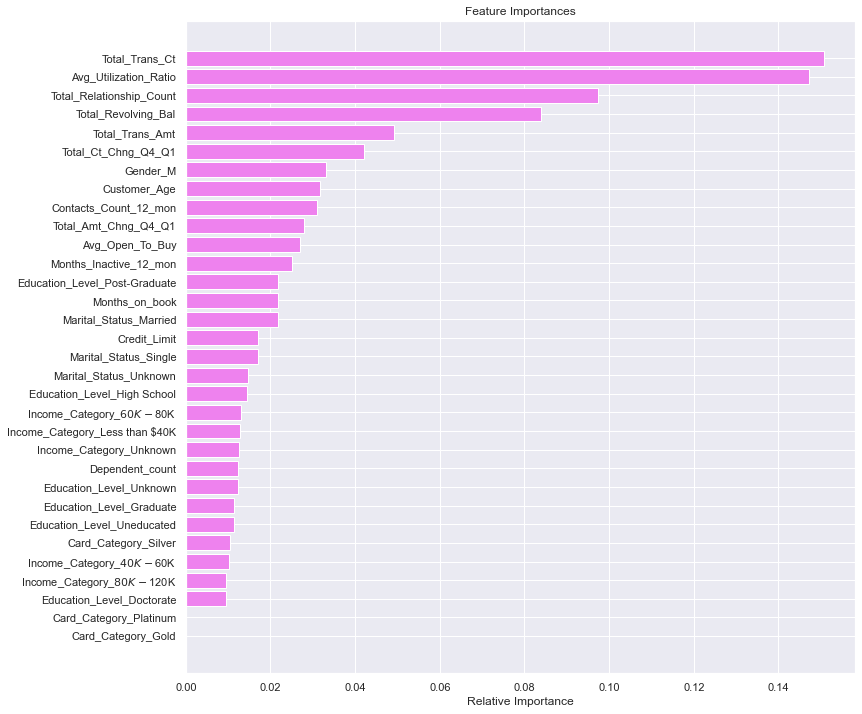

In [116]:
feature_names = X_train.columns
importances = xgb_random_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Business Recommendations

1. Total transaction count is the most important feature as per XGBoost. We also saw during EDA that Total transactions count is clearly lower for attrited customers. It is advised to try to improve the credit card transactions of the customer.
2. Avg_Utilization_Ratio is clearly low for attrited customers. Incentives must be provided to use the credit card regularly.
3. Total no. of products held by the customer is also an important factor to decide if the customer will hold to the credit card.
4. It is also observed that majority of the attrited customers have dependents. The company must understand more how this is related and provide incentives to the dependents.
5. Majority of the attrited customers are inactive for 3 months. The company can find who is inactive continuosly for 2 to 3 months and provide them more incentives to use the credit card.